# Projet 2 : Analysez des données de systèmes éducatifs

## Mission

- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

## Sommaire

### 1. Importation des données
        1.1. Importation des librairies
        1.2. Vérification de l'ensemble de librairies disponibles
        1.3. Importation des dataframes
### 2. Exploration des données (edStatsData.csv)
### 3. Choix des indicateurs et des axes de prospection
        3.1. Création de la liste de pays à retenir (basée sur la population)
        3.2. Création de la liste finale des pays à traiter basé sur un seuil de la population totale 
        3.3. Population d'âge scolaire, enseignement secondaire, les deux sexes (nombre), basée sur l'indicateur SP.SEC.TOTL.IN
        3.4. Taux brut de scolarisation, secondaire, les deux sexes (%), basée sur l'indicateur SE.SEC.ENRR 
        3.5. Population d'âge scolaire, enseignement supérieur, les deux sexes (nombre), basée sur l'indicateur SP.TER.TOTL.IN
        3.6. Inscriptions dans l'enseignement supérieur, tous programmes confondus, hommes et femmes (nombre) basées sur l'indicateur SE.TER.ENRL
        3.7. Taux brut de scolarisation dans l'enseignement supérieur, les deux sexes (%), basés sur l'indicateur SE.TER.ENRR
        3.8. Utilisateurs d'Internet basés sur l'indicateur IT.NET.USER.P2
### 4. Analyse des indicteurs retenus
        4.1. Les indicateurs retenus
        4.2. Filtrage avec les indicateurs retenus
        4.3. Analyses des indicateurs à l'aide de graphiques statistiques
### 5. Création de score en fonction des différents indicateurs
        5.1. Constitution du dataframe pour établir un score
        5.2. Indicateurs manquants par pays
        5.3. Création de score par indicateur et le dataframe regroupant la synthèse des scores
        5.4. La liste de 5 premiers pays qu'on peurrait conseiller au client pour la réalisation du projet
        5.5. Ajoutons une explication avec les radar plot
### 6. Analyse des perspectives à venir
        6.1. NB : On pourrait appliquer ce score pour choisir un pays parmis les continents en utilisant les groupements de pays : choisir le meilleur pays de chaque continent.
        6.2. Analyse du score des 5 premiers pays en tenant compte de nos indicateurs retenus sur les dernières en fournies en données
### 7. Conclusion

## 1. Importation des données

### 1.1. Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi

### 1.2. Vérification de l'ensemble de librairies disponibles

In [2]:
print(pd.show_versions())

C:\Users\tidib\anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : ca60aab7340d9989d9428e11a51467658190bb6b
python           : 3.9.13.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.22621
machine          : AMD64
processor        : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : fr_FR.cp1252

pandas           : 1.4.4
numpy            : 1.21.5
pytz             : 2022.1
dateutil         : 2.8.2
setuptools       : 63.4.1
pip              : 22.2.2
Cython           : 0.29.32
pytest           : 7.1.2
hypothesis       : None
sphinx           : 5.0.2
blosc            : None
feather          : None
xlsxwriter       : 3.0.3
lxml.etree       : 4.9.1
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.3
IPython          : 7.31.1
pandas_datareader: None
bs4              : 4.11.1
bottleneck       : 1.3.5
brotli     

Autre possibilité de vérifier la version de modules utilisés : exemple de pandas et numpy

In [3]:
print(pd.__version__)
print(np.__version__)

1.4.4
1.21.5


### 1.3. Importation des dataframes

- <span style="color: blue;">Le jeu de données EdStatsCountry-Series.csv</span>

In [4]:
edStatsCountry_Series_df = pd.read_csv('./Data/EdStatsCountry-Series.csv')
edStatsCountry_Series_df.head(2)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [5]:
rows, cols = edStatsCountry_Series_df.shape
print(f'Le jeu de données contient {rows} lignes et {cols} colonnes.')

Le jeu de données contient 613 lignes et 4 colonnes.


In [6]:
edStatsCountry_Series_df.isna().mean()

CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
Unnamed: 3     1.0
dtype: float64

Les 3 premières colonnes n'ont aucune valeur manquante, alors que la dernière colonne a toute ces valeurs manquantes

- <span style="color: blue;">Le jeu de données EdStatsFootNote.csv</span>

In [7]:
edStatsFootNote_df = pd.read_csv('./Data/EdStatsFootNote.csv')
edStatsFootNote_df.tail(2)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s,NaN
643637,ZWE,SP.POP.GROW,YR2017,5-year average value between 0s and 5s,NaN


In [8]:
rows, cols = edStatsFootNote_df.shape
print(f'Le jeu de données contient {rows} lignes et {cols} colonnes.')

Le jeu de données contient 643638 lignes et 5 colonnes.


In [9]:
edStatsFootNote_df.isna().mean()

CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
Unnamed: 4     1.0
dtype: float64

Les 3 premières colonnes n'ont aucune valeur manquante, alors que la dernière colonne a toute ces valeurs manquantes

- <span style="color: blue;">Le jeu de données EdStatsSeries.csv</span>

In [10]:
edStatsSeries_df = pd.read_csv('./Data/EdStatsSeries.csv')
edStatsSeries_df.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
rows, cols = edStatsSeries_df.shape
print(f'Le jeu de données contient {rows} lignes et {cols} colonnes.')

Le jeu de données contient 3665 lignes et 21 colonnes.


In [12]:
edStatsSeries_df.isna().mean()

Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Short definition                       0.411733
Long definition                        0.000000
Unit of measure                        1.000000
Periodicity                            0.972988
Base Period                            0.914325
Other notes                            0.849386
Aggregation method                     0.987176
Limitations and exceptions             0.996180
Notes from original source             1.000000
General comments                       0.996180
Source                                 0.000000
Statistical concept and methodology    0.993724
Development relevance                  0.999181
Related source links                   0.941337
Other web links                        1.000000
Related indicators                     1.000000
License Type                           1.000000
Unnamed: 20                            1

Nous avons la majorité des valeurs manquantes dans ce jeu de données

- <span style="color: blue;">Le jeu de données EdStatsCountry.csv</span>

In [13]:
edStatsCountry_df = pd.read_csv('./Data/EdStatsCountry.csv')
edStatsCountry_df.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [14]:
rows, cols = edStatsCountry_df.shape
print(f'Le jeu de données contient {rows} lignes et {cols} colonnes.')

Le jeu de données contient 241 lignes et 32 colonnes.


In [15]:
edStatsCountry_df.isna().mean()

Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.398340
Region                                               0.112033
Income Group                                         0.112033
WB-2 code                                            0.004149
National accounts base year                          0.149378
National accounts reference year                     0.867220
SNA price valuation                                  0.182573
Lending category                                     0.402490
Other groups                                         0.759336
System of National Accounts                          0.107884
Alternat

- <span style="color: blue;">Le jeu de données EdStatsData.csv</span>

In [16]:
edStatsData_df = pd.read_csv('./Data/EdStatsData.csv')
edStatsData_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
rows, cols = edStatsData_df.shape
print(f'Le jeu de données contient {rows} lignes et {cols} colonnes.')

Le jeu de données contient 886930 lignes et 70 colonnes.


## 2. Exploration des données (edStatsData.csv)

2.1. Une description de nos données principales

In [18]:
edStatsData_df.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


2.2. Vérifions le typage de nos données

In [19]:
edStatsData_df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

Les lignes et les colonnes sont bien typés

2.3. Les valeurs manquantes du dataframe

In [20]:
edStatsData_df.isna().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
                    ...   
2085              0.942007
2090              0.942007
2095              0.942007
2100              0.942007
Unnamed: 69       1.000000
Length: 70, dtype: float64

Nous avons ainsi le poucentage des données manquantes pour chaque colonne. Nous ferons par la suite une analyse plus poussée de ces valeurs en tenant compte des indicateurs.

2.4. Vérifions de doublons 

In [21]:
edStatsData_df.duplicated().sum()

0

Nous n'avons pas de doublons dans nos données

Une vue d'ensemble des colonnes

In [22]:
edStatsData_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

## 3. Choix des indicateurs et des axes de prospection

In [23]:
# Nombre d'indicateurs dans notre dataframe
nombre_indics = len(edStatsData_df["Indicator Name"].unique())
print(f"Nous avons dans notre jeu de données : {nombre_indics} indicateurs")

Nous avons dans notre jeu de données : 3665 indicateurs


Après une recherche sur le site de la banque mondiale, J'ai retenu ces axes pour une prospection 
- La population : <span style="color: blue;">SP.POP.TOTL</span>  ,   <span style="color: blue;">SP.SEC.TOTL.IN</span> ,   <span style="color: blue;">SP.TER.TOTL.IN </span>
- L'enseignement secondaire :  <span style="color: blue;">SE.SEC.ENRR</span> 
- L'enseignement supérieur :  <span style="color: blue;">SE.TER.ENRL</span> ,  <span style="color: blue;">SE.TER.ENRR</span> 
- Utilisation d'internet :  <span style="color: blue;">IT.NET.USER.P2</span> 

### 3.1. Création de la liste de pays à retenir (basée sur la population)

3.1.1. Dataframe réduit à l'indicateur de la population totale (<span style="color: blue;">SP.POP.TOTL</span>)

In [24]:
edStatsData_SP_POP_TOTL_df = edStatsData_df.loc[edStatsData_df['Indicator Code'] == 'SP.POP.TOTL', :]

3.1.2. Filtrage sur la population totale des pays

In [25]:
edStatsData_SP_POP_TOTL_df

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
2533,Arab World,ARB,"Population, total",SP.POP.TOTL,1.234009e+08,1.267261e+08,1.300956e+08,1.335924e+08,1.373274e+08,1.413761e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6198,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1.288581e+09,1.322182e+09,1.354003e+09,1.384272e+09,1.414385e+09,1.441542e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9863,East Asia & Pacific (excluding high income),EAP,"Population, total",SP.POP.TOTL,1.115427e+09,1.146090e+09,1.175063e+09,1.203125e+09,1.229693e+09,1.253833e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13528,Euro area,EMU,"Population, total",SP.POP.TOTL,2.874162e+08,2.890325e+08,2.910407e+08,2.929618e+08,2.946894e+08,2.962447e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17193,Europe & Central Asia,ECS,"Population, total",SP.POP.TOTL,7.379482e+08,7.436074e+08,7.498159e+08,7.558680e+08,7.617013e+08,7.673326e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871138,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,6.300000e+04,7.100000e+04,7.600000e+04,8.400000e+04,9.000000e+04,9.400000e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874803,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878468,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,6.193810e+06,6.300554e+06,6.407295e+06,6.523452e+06,6.661566e+06,6.830692e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882133,Zambia,ZMB,"Population, total",SP.POP.TOTL,4.173928e+06,4.317748e+06,4.469895e+06,4.629402e+06,4.794754e+06,4.964831e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Installation de la librairie missingno

In [26]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [27]:
#Importation du package missigno
import missingno as msno

- Vérification du taux de remplissage basé sur la population

<AxesSubplot:>

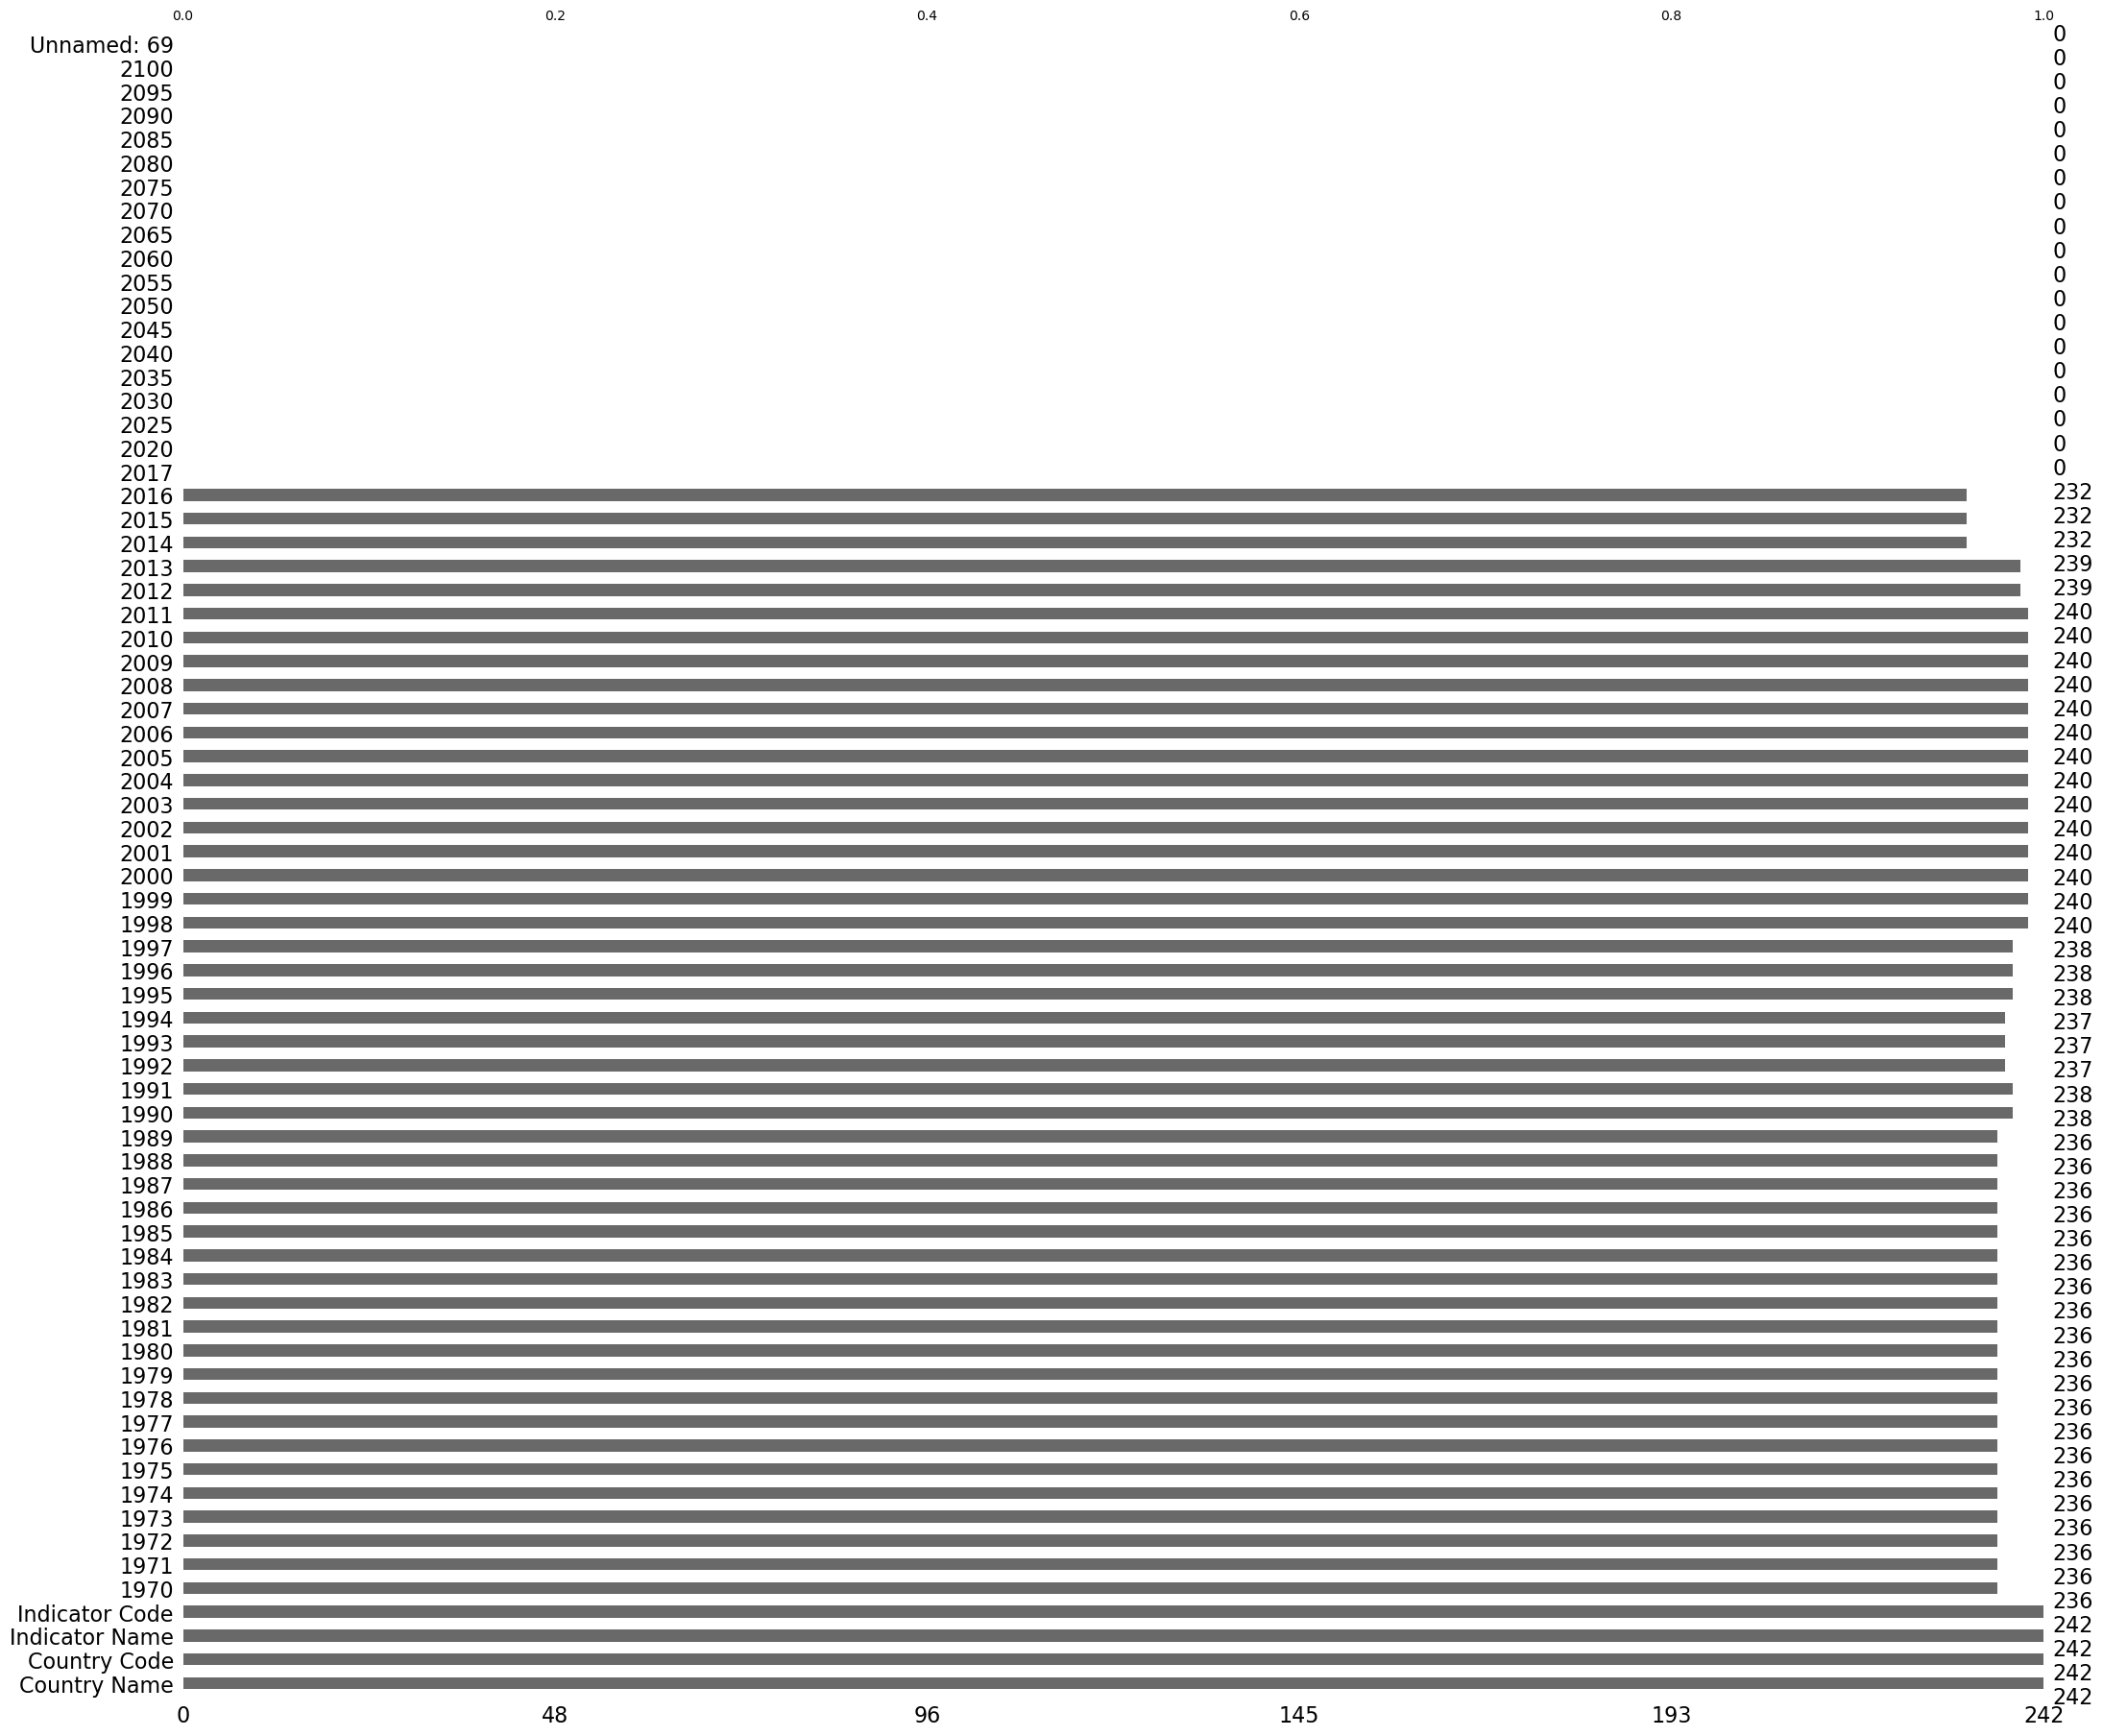

In [28]:
msno.bar(edStatsData_SP_POP_TOTL_df)

- Les pays qui n'ont pas de données en 2016

In [29]:
mask = edStatsData_SP_POP_TOTL_df['2014'].isna()
edStatsData_SP_POP_TOTL_df[mask]["Country Name"]

2533                     Arab World
24523                European Union
72168                  OECD members
193113       British Virgin Islands
277408                      Curacao
317723                      Eritrea
596263                        Nauru
720873    Sint Maarten (Dutch part)
742863                  South Sudan
761188     St. Martin (French part)
Name: Country Name, dtype: object

<AxesSubplot:>

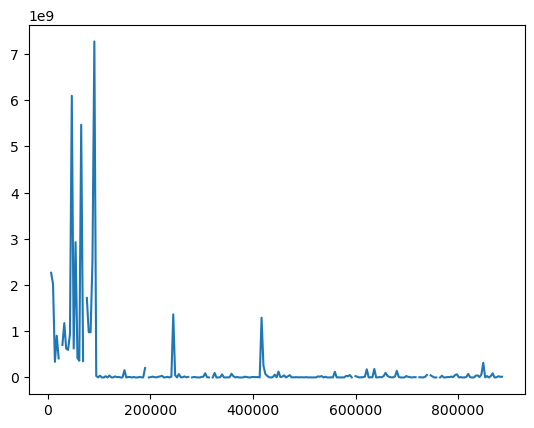

In [30]:
#Le diagramme représentative de la population en 2014
edStatsData_SP_POP_TOTL_df['2014'].plot()

<AxesSubplot:ylabel='Frequency'>

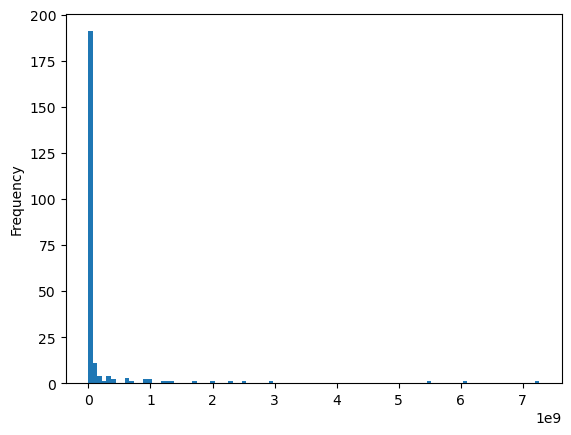

In [31]:
#La même représentation avec un histogramme
edStatsData_SP_POP_TOTL_df['2014'].plot(kind='hist', bins=100)

- Dataframe des pays basé sur un seuil de la population en 2016

In [32]:
# la moyenne de la population totale en 2016
seuil = edStatsData_SP_POP_TOTL_df['2014'].mean()
# les pays qui ont leur population plus grand que le seuil en 2016
mask = edStatsData_SP_POP_TOTL_df['2014'] > seuil

edStatsData_SP_POP_TOTL_df[mask]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
6198,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1.288581e+09,1.322182e+09,1.354003e+09,1.384272e+09,1.414385e+09,1.441542e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9863,East Asia & Pacific (excluding high income),EAP,"Population, total",SP.POP.TOTL,1.115427e+09,1.146090e+09,1.175063e+09,1.203125e+09,1.229693e+09,1.253833e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13528,Euro area,EMU,"Population, total",SP.POP.TOTL,2.874162e+08,2.890325e+08,2.910407e+08,2.929618e+08,2.946894e+08,2.962447e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17193,Europe & Central Asia,ECS,"Population, total",SP.POP.TOTL,7.379482e+08,7.436074e+08,7.498159e+08,7.558680e+08,7.617013e+08,7.673326e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20858,Europe & Central Asia (excluding high income),ECA,"Population, total",SP.POP.TOTL,3.186996e+08,3.222349e+08,3.257621e+08,3.292678e+08,3.327896e+08,3.363302e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28188,Heavily indebted poor countries (HIPC),HPC,"Population, total",SP.POP.TOTL,2.084151e+08,2.139785e+08,2.197243e+08,2.256456e+08,2.317329e+08,2.379792e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31853,High income,HIC,"Population, total",SP.POP.TOTL,8.468829e+08,8.556393e+08,8.645394e+08,8.725677e+08,8.816704e+08,8.902467e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35518,Latin America & Caribbean,LCN,"Population, total",SP.POP.TOTL,2.873609e+08,2.946202e+08,3.019841e+08,3.094468e+08,3.169877e+08,3.245904e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39183,Latin America & Caribbean (excluding high income),LAC,"Population, total",SP.POP.TOTL,2.705062e+08,2.775029e+08,2.846058e+08,2.918040e+08,2.990822e+08,3.064290e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42848,Least developed countries: UN classification,LDC,"Population, total",SP.POP.TOTL,3.084864e+08,3.160046e+08,3.235065e+08,3.310952e+08,3.389203e+08,3.470931e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.2. Création de la liste finale des pays à traiter basé sur un seuil de la population totale 

- Retirons les observations qui ne sont pas des pays 

In [33]:
# Nombre de pays et unions de pays dans le jeu de données
liste_pays = list(edStatsData_SP_POP_TOTL_df["Country Name"].unique())

unions_pays = []
while 'World' in liste_pays:
    unions_pays.append(liste_pays.pop(0))
print("Liste des {} unions de pays : de {} à {}".format(len(unions_pays), unions_pays[0], unions_pays[-1]))
print("Liste des {} pays : de {} à {}".format(len(liste_pays), liste_pays[0], liste_pays[-1]))

Liste des 25 unions de pays : de Arab World à World
Liste des 217 pays : de Afghanistan à Zimbabwe


In [34]:
liste_pays

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Pol

- Retirons les unions de pays du dataframe de la population totale

In [35]:
# création d'un mask qui contient la liste de pays qu'on applique au dataframe de la population totale
mask_country_keep = edStatsData_SP_POP_TOTL_df['Country Name'].isin(liste_pays)
edStatsData_SP_POP_TOTL_df[mask_country_keep]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
94158,Afghanistan,AFG,"Population, total",SP.POP.TOTL,11126123.0,11417825.0,11721940.0,12027822.0,12321541.0,12590286.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97823,Albania,ALB,"Population, total",SP.POP.TOTL,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101488,Algeria,DZA,"Population, total",SP.POP.TOTL,14550034.0,14960109.0,15377093.0,15804428.0,16247113.0,16709099.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105153,American Samoa,ASM,"Population, total",SP.POP.TOTL,27292.0,27916.0,28492.0,29014.0,29488.0,29932.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108818,Andorra,AND,"Population, total",SP.POP.TOTL,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871138,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,63000.0,71000.0,76000.0,84000.0,90000.0,94000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874803,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878468,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,6193810.0,6300554.0,6407295.0,6523452.0,6661566.0,6830692.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882133,Zambia,ZMB,"Population, total",SP.POP.TOTL,4173928.0,4317748.0,4469895.0,4629402.0,4794754.0,4964831.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# dataframe des pays retenus
edStatsData_SP_POP_TOTL_df_country = edStatsData_SP_POP_TOTL_df[mask_country_keep]

In [37]:
# définissons un seul qui représente la moyenne de la population des pays retenus en 2014
seuil = edStatsData_SP_POP_TOTL_df_country["2014"].mean()
# les pays qui ont leur population plus grand que le seuil en 2014
edStatsData_SP_POP_TOTL_df_country[edStatsData_SP_POP_TOTL_df_country["2014"] > seuil]["Country Name"]

101488               Algeria
119813             Argentina
149133            Bangladesh
189448                Brazil
222433                Canada
244423                 China
248088              Colombia
255418      Congo, Dem. Rep.
306728      Egypt, Arab Rep.
325053              Ethiopia
339713                France
358038               Germany
416678                 India
420343             Indonesia
424008    Iran, Islamic Rep.
427673                  Iraq
442333                 Italy
449663                 Japan
460658                 Kenya
471653           Korea, Rep.
559613                Mexico
588933               Myanmar
621918               Nigeria
636578              Pakistan
658568           Philippines
662233                Poland
680558    Russian Federation
739198          South Africa
746528                 Spain
768518                 Sudan
794173              Tanzania
797838              Thailand
819828                Turkey
834488                Uganda
838153        

- Liste de pays basés sur un seuil de la population totale

In [38]:
liste_pays_seuil = (edStatsData_SP_POP_TOTL_df_country[edStatsData_SP_POP_TOTL_df_country["2014"] > seuil]["Country Name"]).values
liste_pays_seuil

array(['Algeria', 'Argentina', 'Bangladesh', 'Brazil', 'Canada', 'China',
       'Colombia', 'Congo, Dem. Rep.', 'Egypt, Arab Rep.', 'Ethiopia',
       'France', 'Germany', 'India', 'Indonesia', 'Iran, Islamic Rep.',
       'Iraq', 'Italy', 'Japan', 'Kenya', 'Korea, Rep.', 'Mexico',
       'Myanmar', 'Nigeria', 'Pakistan', 'Philippines', 'Poland',
       'Russian Federation', 'South Africa', 'Spain', 'Sudan', 'Tanzania',
       'Thailand', 'Turkey', 'Uganda', 'Ukraine', 'United Kingdom',
       'United States', 'Vietnam'], dtype=object)

### 3.3. Population d'âge scolaire, enseignement secondaire, les deux sexes (nombre), basée sur l'indicateur <span style="color: blue;">SP.SEC.TOTL.IN</span>                 

In [39]:
edStatsData_SP_SEC_TOTL_IN_df = edStatsData_df.loc[edStatsData_df['Indicator Code'] == 'SP.SEC.TOTL.IN', :]
edStatsData_SP_SEC_TOTL_IN_df

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
2323,Arab World,ARB,Population of the official age for secondary e...,SP.SEC.TOTL.IN,18876754.0,19472980.0,19941252.0,20428272.0,20960312.0,21553740.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5988,East Asia & Pacific,EAS,Population of the official age for secondary e...,SP.SEC.TOTL.IN,125915792.0,125476800.0,125995808.0,128215200.0,131902568.0,136593008.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9653,East Asia & Pacific (excluding high income),EAP,Population of the official age for secondary e...,SP.SEC.TOTL.IN,108143512.0,107681304.0,108199456.0,110418712.0,114089856.0,118714328.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13318,Euro area,EMU,Population of the official age for secondary e...,SP.SEC.TOTL.IN,33273980.0,33704952.0,34262792.0,34842736.0,35410824.0,35950552.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16983,Europe & Central Asia,ECS,Population of the official age for secondary e...,SP.SEC.TOTL.IN,92391984.0,93464744.0,94402720.0,95106912.0,95559496.0,95767744.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870928,Virgin Islands (U.S.),VIR,Population of the official age for secondary e...,SP.SEC.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874593,West Bank and Gaza,PSE,Population of the official age for secondary e...,SP.SEC.TOTL.IN,203117.0,203862.0,210215.0,220742.0,234107.0,248468.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878258,"Yemen, Rep.",YEM,Population of the official age for secondary e...,SP.SEC.TOTL.IN,782929.0,797524.0,806583.0,820049.0,838078.0,861212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881923,Zambia,ZMB,Population of the official age for secondary e...,SP.SEC.TOTL.IN,433938.0,449069.0,466011.0,484246.0,503421.0,523550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Retirons les unions de pays du dataframe de cette population 

In [40]:
mask_country_keep_seuil = edStatsData_SP_SEC_TOTL_IN_df['Country Name'].isin(liste_pays)
edStatsData_SP_SEC_TOTL_IN_df[mask_country_keep_seuil]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
93948,Afghanistan,AFG,Population of the official age for secondary e...,SP.SEC.TOTL.IN,1394376.0,1433848.0,1479039.0,1526503.0,1574259.0,1682117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97613,Albania,ALB,Population of the official age for secondary e...,SP.SEC.TOTL.IN,381224.0,397218.0,413339.0,428483.0,442595.0,455363.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101278,Algeria,DZA,Population of the official age for secondary e...,SP.SEC.TOTL.IN,2326438.0,2414570.0,2479183.0,2539116.0,2603754.0,2680788.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104943,American Samoa,ASM,Population of the official age for secondary e...,SP.SEC.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108608,Andorra,AND,Population of the official age for secondary e...,SP.SEC.TOTL.IN,4471.0,4711.0,4914.0,5051.0,5133.0,5162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870928,Virgin Islands (U.S.),VIR,Population of the official age for secondary e...,SP.SEC.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874593,West Bank and Gaza,PSE,Population of the official age for secondary e...,SP.SEC.TOTL.IN,203117.0,203862.0,210215.0,220742.0,234107.0,248468.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878258,"Yemen, Rep.",YEM,Population of the official age for secondary e...,SP.SEC.TOTL.IN,782929.0,797524.0,806583.0,820049.0,838078.0,861212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881923,Zambia,ZMB,Population of the official age for secondary e...,SP.SEC.TOTL.IN,433938.0,449069.0,466011.0,484246.0,503421.0,523550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# dataframe après application du mask basé sur l'incateur SP.SEC.TOTL.IN
edStatsData_SP_SEC_TOTL_IN_df_country_keep_seuil = edStatsData_SP_SEC_TOTL_IN_df[mask_country_keep_seuil]

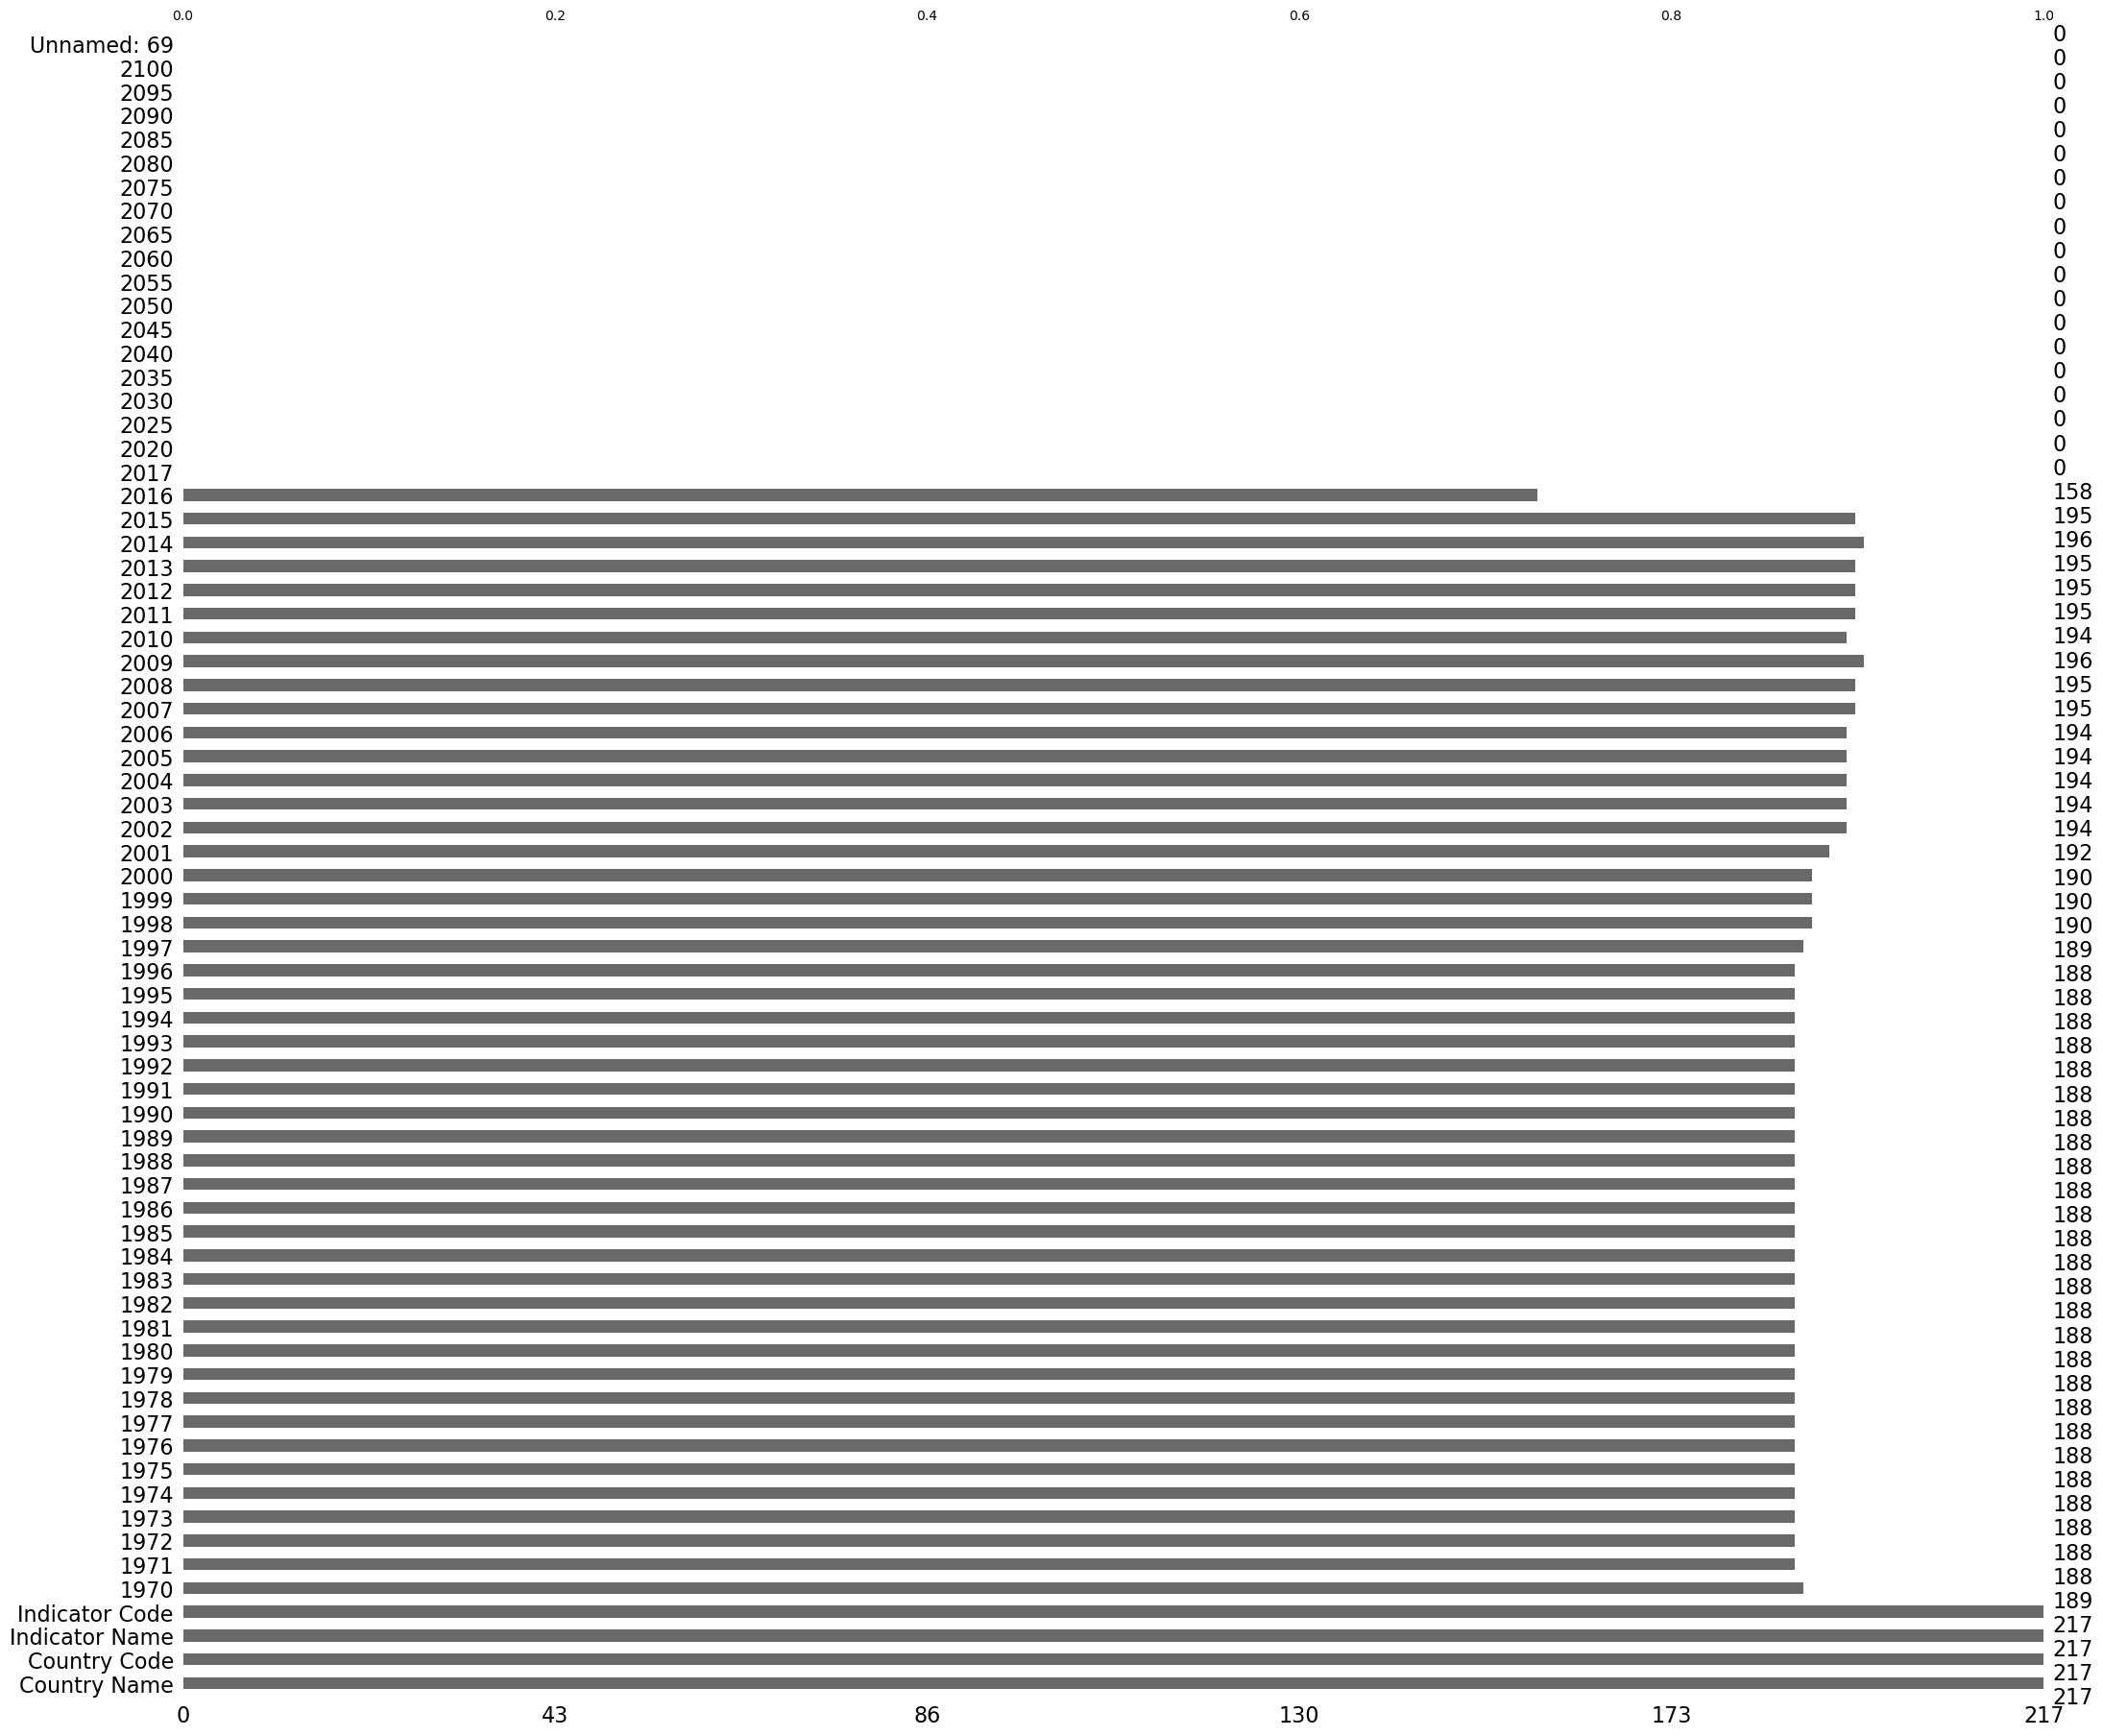

In [42]:
# La visualisation de ce dataframe à l'aide de Missingo
msno.bar(edStatsData_SP_SEC_TOTL_IN_df_country_keep_seuil)
plt.savefig('edStatsData_SP_SEC_TOTL_IN_df_msno.png')

- les pays où la population d'âge scolaire de l'enseignement secondaire est nulle en 2014

In [43]:
mask_edStatsData_SP_SEC_TOTL_IN_df_country_keep_seuil = edStatsData_SP_SEC_TOTL_IN_df_country_keep_seuil['2014'].isna()
edStatsData_SP_SEC_TOTL_IN_df_country_keep_seuil[mask_edStatsData_SP_SEC_TOTL_IN_df_country_keep_seuil ]["Country Name"]

104943               American Samoa
108608                      Andorra
123268                      Armenia
181908       Bosnia and Herzegovina
225888               Cayman Islands
236883              Channel Islands
328508                Faroe Islands
343168             French Polynesia
365158                    Gibraltar
372488                    Greenland
379818                         Guam
434793                  Isle of Man
475108                       Kosovo
570398                       Monaco
607048                New Caledonia
625373     Northern Mariana Islands
716998                    Singapore
720663    Sint Maarten (Dutch part)
760978     St. Martin (French part)
826948     Turks and Caicos Islands
870928        Virgin Islands (U.S.)
Name: Country Name, dtype: object

<AxesSubplot:ylabel='Frequency'>

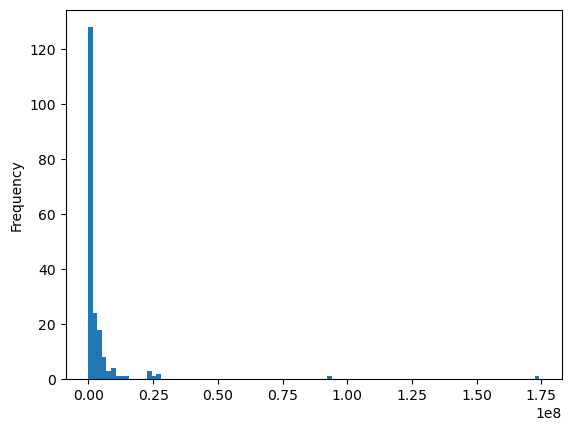

In [44]:
#L'histogramme qui représente ce dataframe en 2014
edStatsData_SP_SEC_TOTL_IN_df_country_keep_seuil ['2014'].plot(kind='hist', bins=100)

- Retenons un nombre de pays à la base d'un seuil de cette population (<span style="color: blue;">SP.SEC.TOTL.IN</span>)

In [45]:
# définissons un seul qui représente la moyenne de cette population (SP.SEC.TOTL.IN) en 2014
seuil = edStatsData_SP_SEC_TOTL_IN_df_country_keep_seuil["2014"].mean()
# les pays qui ont leur population plus grand que le seuil en 2016
edStatsData_SP_SEC_TOTL_IN_df_country_keep_seuil[edStatsData_SP_SEC_TOTL_IN_df_country_keep_seuil["2014"] > seuil]["Country Name"]

93948            Afghanistan
101278               Algeria
119603             Argentina
148923            Bangladesh
189238                Brazil
244213                 China
247878              Colombia
255208      Congo, Dem. Rep.
306518      Egypt, Arab Rep.
324843              Ethiopia
339503                France
357828               Germany
361493                 Ghana
416468                 India
420133             Indonesia
423798    Iran, Islamic Rep.
427463                  Iraq
442123                 Italy
449453                 Japan
460448                 Kenya
526418            Madagascar
533748              Malaysia
559403                Mexico
588723               Myanmar
599718                 Nepal
621708               Nigeria
636368              Pakistan
658358           Philippines
680348    Russian Federation
738988          South Africa
768308                 Sudan
793963              Tanzania
797628              Thailand
819618                Turkey
834278        

Cet indicateur (<span style="color: blue;">SP.SEC.TOTL.IN</span>) nous permet de retenir ces 39 pays ci-dessus

### 3.4. Taux brut de scolarisation, secondaire, les deux sexes (%), basée sur l'indicateur <span style="color: blue;"> SE.SEC.ENRR</span> 

In [46]:
edStatsData_SE_SEC_ENRR_df = edStatsData_df.loc[edStatsData_df['Indicator Code'] == 'SE.SEC.ENRR', :]
edStatsData_SE_SEC_ENRR_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
1335,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,25.655161,25.583361,26.429720,27.379009,28.333860,29.867710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5000,East Asia & Pacific,EAS,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,34.562740,40.060822,44.540352,48.199089,46.657349,47.492901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8665,East Asia & Pacific (excluding high income),EAP,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,28.547609,35.022991,40.030170,44.046459,42.076462,42.922119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12330,Euro area,EMU,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,77.661232,77.723152,78.894081,80.776329,82.498970,83.100449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15995,Europe & Central Asia,ECS,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,81.287376,81.306168,81.988457,83.043411,84.094978,84.617928,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Retirons les unions de pays du dataframe de cette population

In [47]:
# application du mask sur cette population (SE.SEC.ENRR)
mask_edStatsData_SE_SEC_ENRR_df_country_keep_seuil = edStatsData_SE_SEC_ENRR_df['Country Name'].isin(liste_pays)
edStatsData_SE_SEC_ENRR_df[mask_edStatsData_SE_SEC_ENRR_df_country_keep_seuil]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
92960,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,8.33161,9.35029,10.34861,10.83169,10.976400,11.041030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96625,Albania,ALB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100290,Algeria,DZA,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,10.03636,12.07172,13.52412,14.747980,16.028271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103955,American Samoa,ASM,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107620,Andorra,AND,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,15.36829,14.71306,13.81905,17.338791,25.939560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869940,Virgin Islands (U.S.),VIR,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873605,West Bank and Gaza,PSE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877270,"Yemen, Rep.",YEM,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880935,Zambia,ZMB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,12.94701,13.41331,13.88272,13.52494,14.066160,14.835640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# dataframe après application du mask basé sur l'indicateur SE.SEC.ENRR
edStatsData_SE_SEC_ENRR_df_country_keep_seuil = edStatsData_SE_SEC_ENRR_df[mask_edStatsData_SE_SEC_ENRR_df_country_keep_seuil]

<AxesSubplot:>

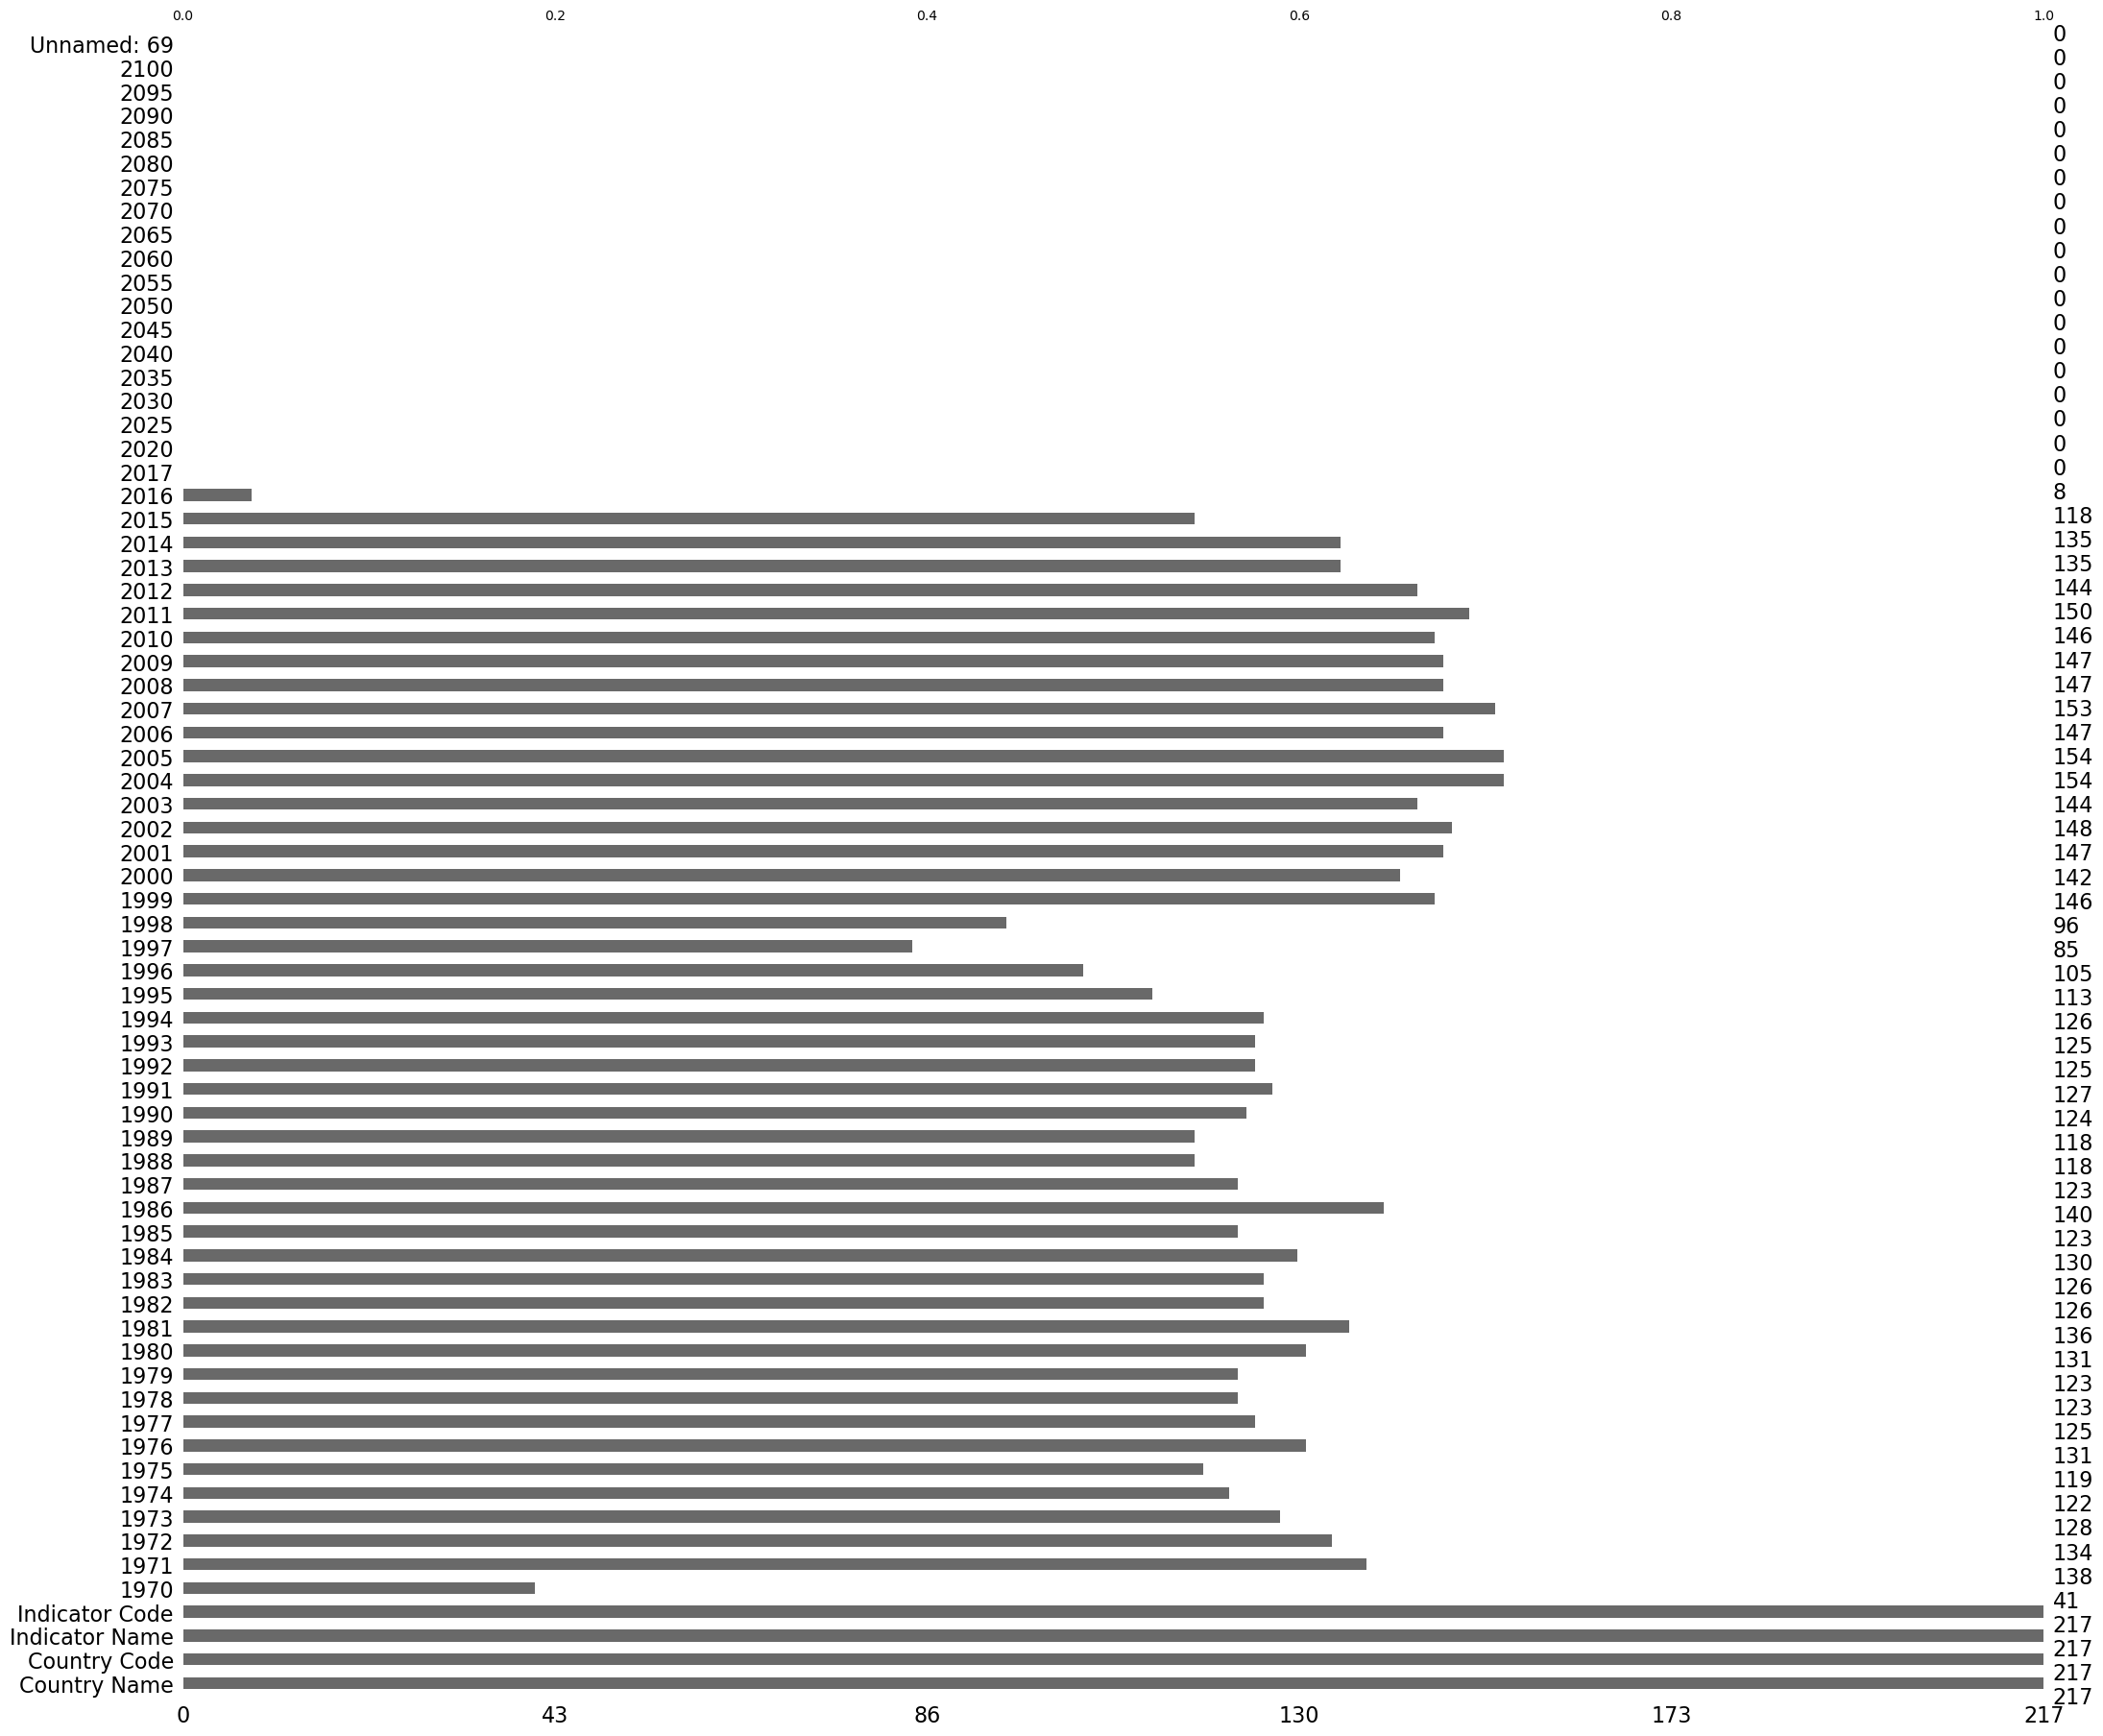

In [49]:
# La visualisation de ce dataframe à l'aide de Missingo
msno.bar(edStatsData_SE_SEC_ENRR_df_country_keep_seuil)

- les pays où les taux brut de scolarisation secondaire les deux sexes sont nuls en 2014

In [50]:
mask_edStatsData_SE_SEC_ENRR_df_country_keep_seuil = edStatsData_SE_SEC_ENRR_df_country_keep_seuil['2014'].isna()
edStatsData_SE_SEC_ENRR_df_country_keep_seuil[mask_edStatsData_SE_SEC_ENRR_df_country_keep_seuil ]["Country Name"]

100290                  Algeria
103955           American Samoa
107620                  Andorra
111285                   Angola
122280                  Armenia
                  ...          
866275                  Vietnam
869940    Virgin Islands (U.S.)
877270              Yemen, Rep.
880935                   Zambia
884600                 Zimbabwe
Name: Country Name, Length: 82, dtype: object

<AxesSubplot:ylabel='Frequency'>

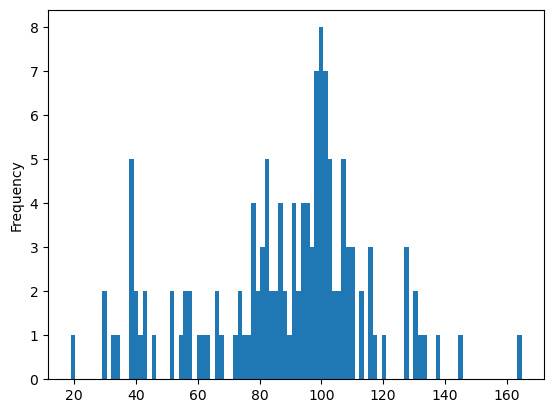

In [51]:
#L'histogramme qui représente ce dataframe en 2014
edStatsData_SE_SEC_ENRR_df_country_keep_seuil['2014'].plot(kind='hist', bins=100)

- Retenons un nombre de pays à la base d'un seuil de cette population (<span style="color: blue;">SE.SEC.ENRR</span>)

In [52]:
# définissons un seul qui représente la moyenne de cette population (SE.SEC.ENRR) en 2014
seuil = edStatsData_SE_SEC_ENRR_df_country_keep_seuil["2014"].mean()
# les pays qui ont leur population plus grand que le seuil en 2014
edStatsData_SE_SEC_ENRR_df_country_keep_seuil[edStatsData_SE_SEC_ENRR_df_country_keep_seuil["2014"] > seuil]["Country Name"]

96625                 Albania
114950    Antigua and Barbuda
118615              Argentina
129610              Australia
133275                Austria
                 ...         
844285         United Kingdom
847950          United States
851615                Uruguay
855280             Uzbekistan
862610          Venezuela, RB
Name: Country Name, Length: 78, dtype: object

Cet indicateur (<span style="color: blue;">SE.SEC.ENRR</span>) nous permet de retenir ces 78 pays ci-dessus

### 3.5. Population d'âge scolaire, enseignement supérieur, les deux sexes (nombre), basée sur l'indicateur <span style="color: blue;"> SP.TER.TOTL.IN</span> 

In [53]:
edStatsData_SP_TER_TOTL_IN_df = edStatsData_df.loc[edStatsData_df['Indicator Code'] == 'SP.TER.TOTL.IN', :]
edStatsData_SP_TER_TOTL_IN_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
2326,Arab World,ARB,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,11978659.0,12460172.0,12882067.0,13341220.0,13808595.0,14264110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5991,East Asia & Pacific,EAS,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,122437192.0,128374992.0,132090504.0,134180624.0,134406272.0,133647600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9656,East Asia & Pacific (excluding high income),EAP,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,107191696.0,113260880.0,117173232.0,119461160.0,119825320.0,119155152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13321,Euro area,EMU,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,21430524.0,21460246.0,21475948.0,21503116.0,21619538.0,21815316.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16986,Europe & Central Asia,ECS,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,58655224.0,59908220.0,61006184.0,61988728.0,62938856.0,63827496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Retirons les unions de pays du dataframe de cette population

In [54]:
# application du mask sur cette population (SP.TER.TOTL.IN)
mask_edStatsData_SP_TER_TOTL_IN_df_country_keep_seuil = edStatsData_SP_TER_TOTL_IN_df['Country Name'].isin(liste_pays)
edStatsData_SP_TER_TOTL_IN_df[mask_edStatsData_SP_TER_TOTL_IN_df_country_keep_seuil]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
93951,Afghanistan,AFG,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,1006550.0,1018356.0,1030753.0,1046695.0,1067623.0,1134688.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97616,Albania,ALB,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,175511.0,183117.0,192034.0,201407.0,211036.0,221080.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101281,Algeria,DZA,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,1098933.0,1175253.0,1266857.0,1367537.0,1461621.0,1540489.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104946,American Samoa,ASM,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108611,Andorra,AND,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,2479.0,2740.0,3022.0,3295.0,3549.0,3800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870931,Virgin Islands (U.S.),VIR,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874596,West Bank and Gaza,PSE,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,104867.0,102763.0,102367.0,103651.0,106294.0,109539.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878261,"Yemen, Rep.",YEM,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,601223.0,598971.0,586796.0,578335.0,576488.0,581144.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881926,Zambia,ZMB,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,365314.0,375578.0,386589.0,398784.0,412361.0,427158.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# dataframe après application du mask basé sur l'indicateur SP.TER.TOTL.IN
edStatsData_SP_TER_TOTL_IN_df_country_keep_seuil = edStatsData_SP_TER_TOTL_IN_df[mask_edStatsData_SP_TER_TOTL_IN_df_country_keep_seuil]

<AxesSubplot:>

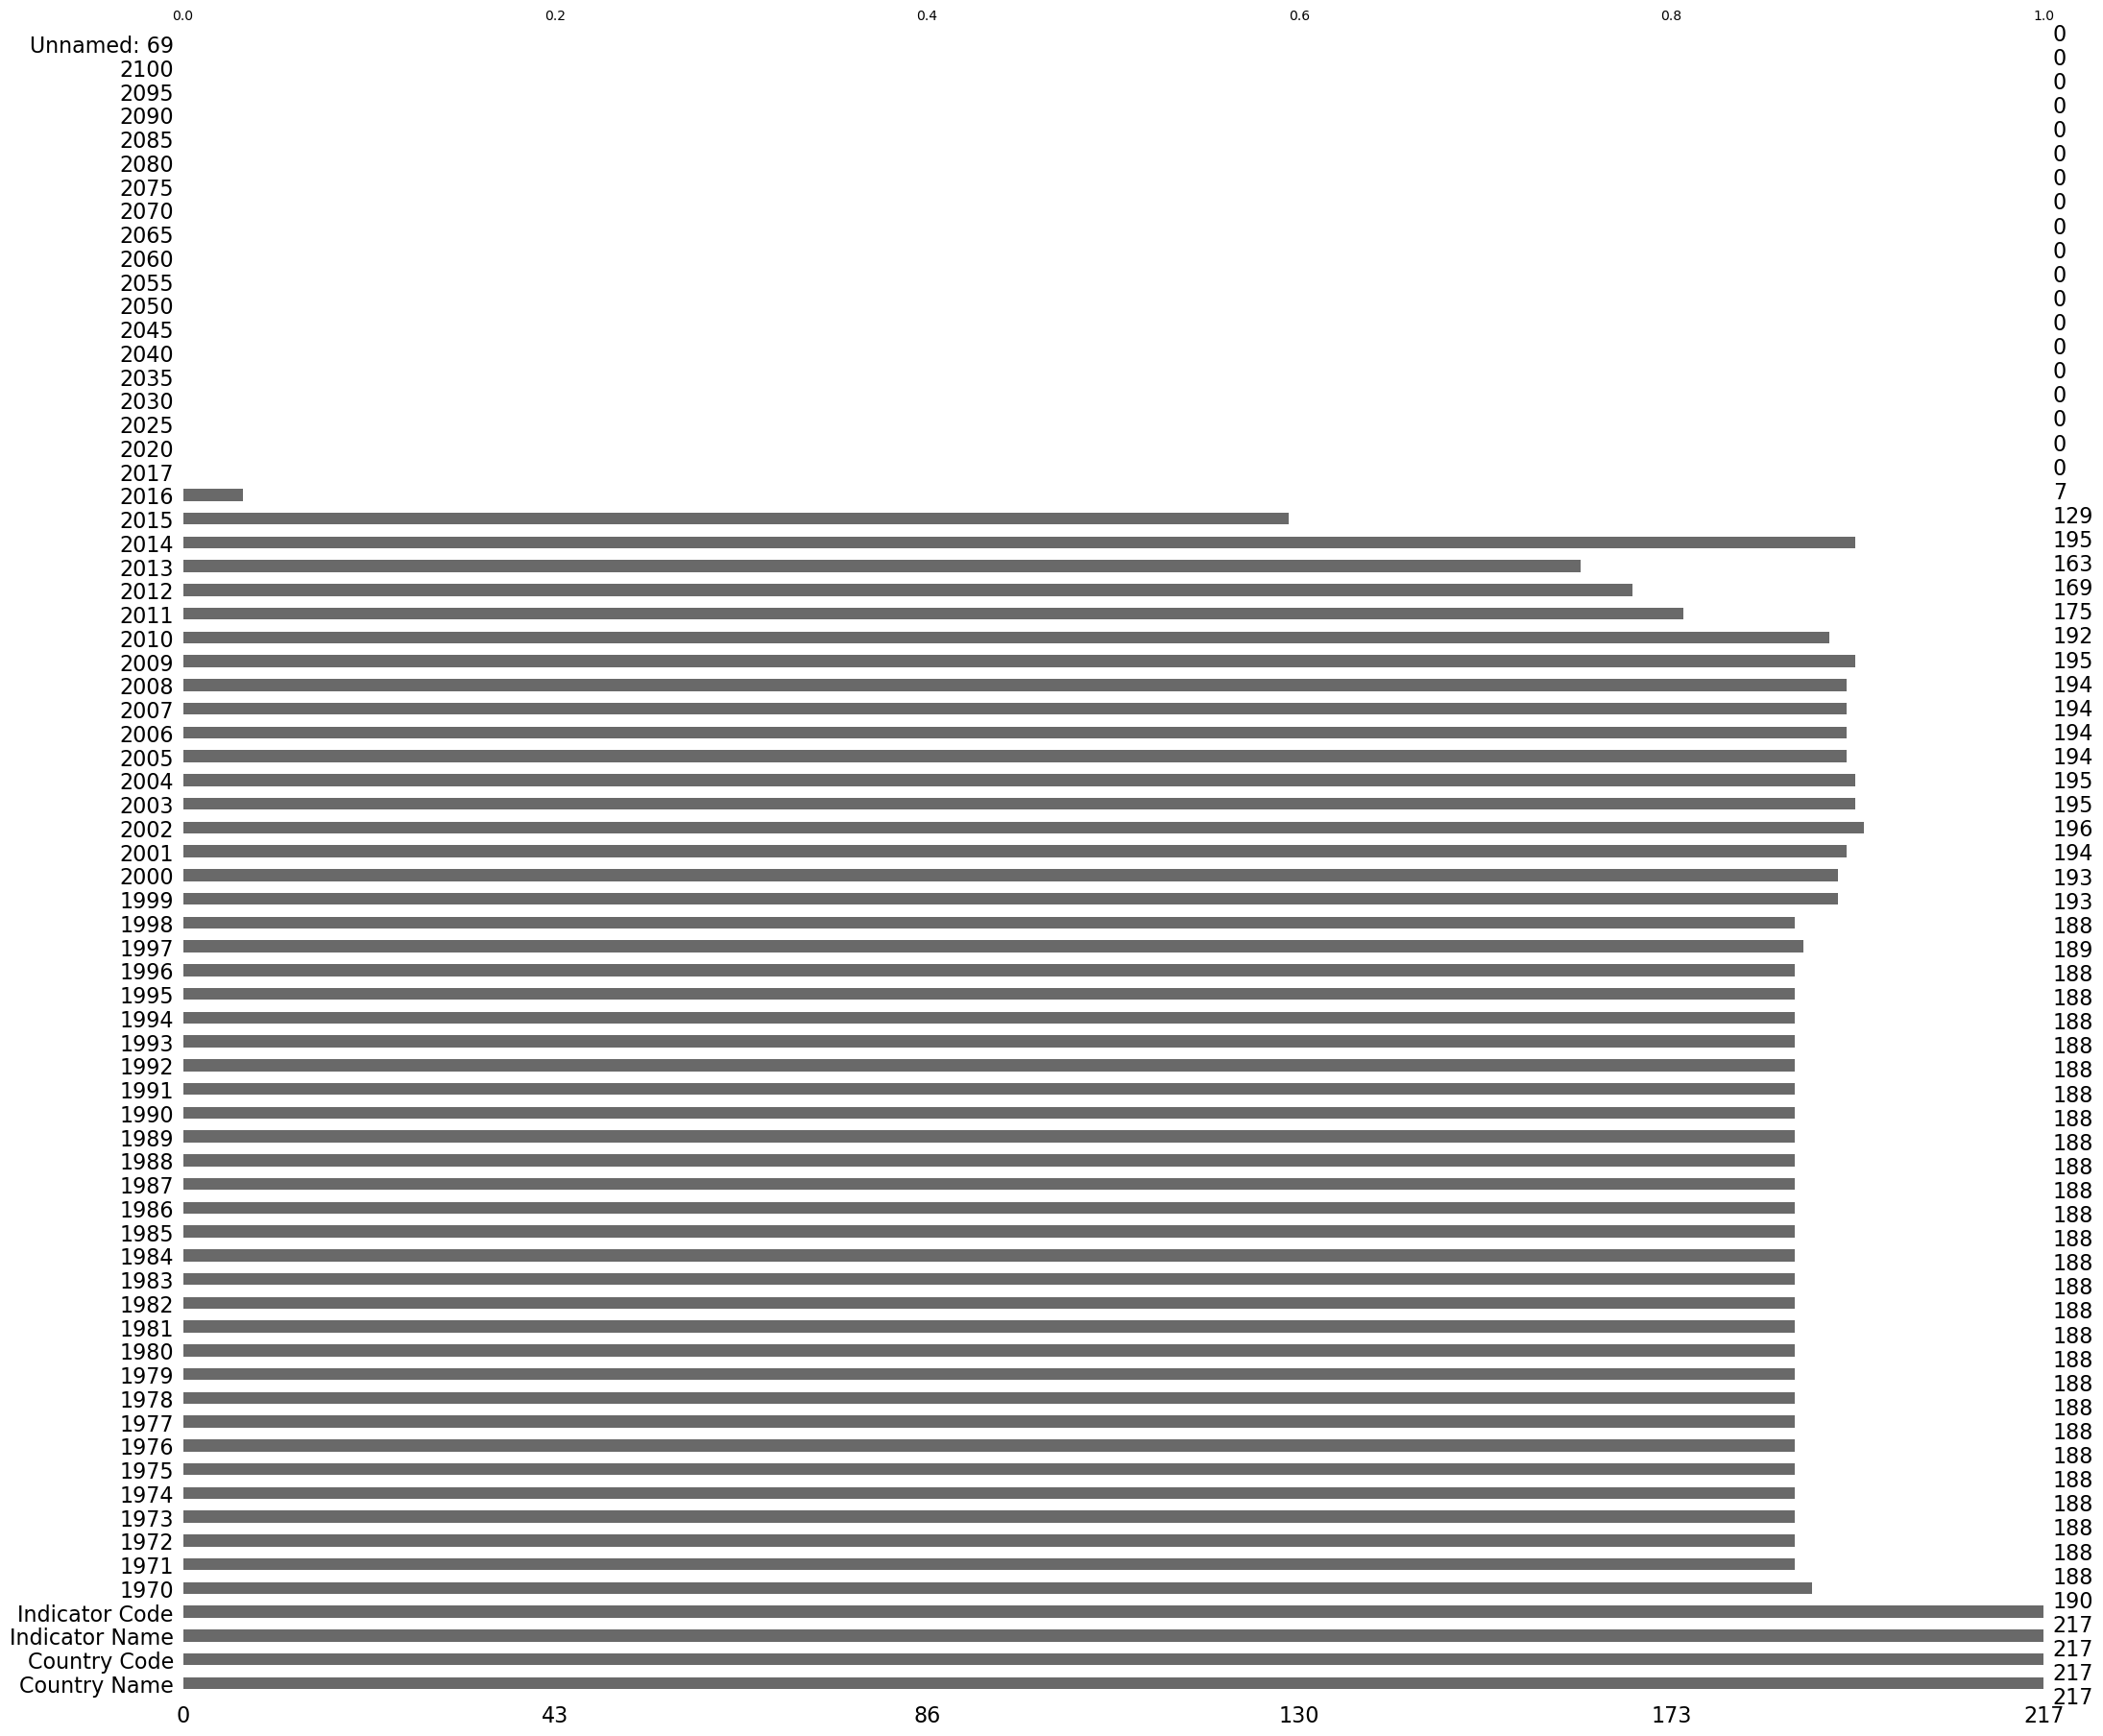

In [56]:
# La visualisation de ce dataframe à l'aide de Missingo
msno.bar(edStatsData_SP_TER_TOTL_IN_df_country_keep_seuil)

- les pays où la population d'âge scolaire, enseignement supérieur est n'a pas de données en 2015

In [57]:
mask = edStatsData_SP_TER_TOTL_IN_df_country_keep_seuil['2014'].isna()
edStatsData_SP_TER_TOTL_IN_df_country_keep_seuil[mask]["Country Name"]

104946               American Samoa
108611                      Andorra
181911       Bosnia and Herzegovina
225891               Cayman Islands
236886              Channel Islands
328511                Faroe Islands
343171             French Polynesia
365161                    Gibraltar
372491                    Greenland
379821                         Guam
434796                  Isle of Man
475111                       Kosovo
570401                       Monaco
607051                New Caledonia
625376     Northern Mariana Islands
632706                         Oman
717001                    Singapore
720666    Sint Maarten (Dutch part)
760981     St. Martin (French part)
826951     Turks and Caicos Islands
841611         United Arab Emirates
870931        Virgin Islands (U.S.)
Name: Country Name, dtype: object

<AxesSubplot:ylabel='Frequency'>

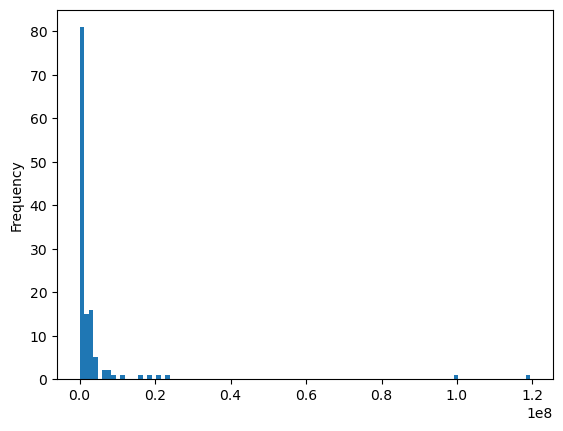

In [58]:
#L'histogramme qui représente ce dataframe en 2015
edStatsData_SP_TER_TOTL_IN_df_country_keep_seuil ['2015'].plot(kind='hist', bins=100)

- Retenons un nombre de pays à la base d'un seuil de cette population (<span style="color: blue;"> SP.TER.TOTL.IN</span>)

In [59]:
# définissons un seul qui représente la moyenne de cette population (SP.TER.TOTL.IN) en 2015
seuil = edStatsData_SP_TER_TOTL_IN_df_country_keep_seuil["2014"].mean()
# les pays qui ont leur population plus grand que le seuil en 2015
edStatsData_SP_TER_TOTL_IN_df_country_keep_seuil[edStatsData_SP_TER_TOTL_IN_df_country_keep_seuil["2014"] > seuil]["Country Name"]

101281               Algeria
119606             Argentina
148926            Bangladesh
189241                Brazil
244216                 China
247881              Colombia
255211      Congo, Dem. Rep.
306521      Egypt, Arab Rep.
324846              Ethiopia
339506                France
357831               Germany
416471                 India
420136             Indonesia
423801    Iran, Islamic Rep.
427466                  Iraq
449456                 Japan
460451                 Kenya
471446           Korea, Rep.
533751              Malaysia
559406                Mexico
581396               Morocco
588726               Myanmar
621711               Nigeria
636371              Pakistan
658361           Philippines
680351    Russian Federation
738991          South Africa
768311                 Sudan
793966              Tanzania
797631              Thailand
819621                Turkey
834281                Uganda
845276        United Kingdom
848941         United States
867266        

Cet indicateur (<span style="color: blue;"> SP.TER.TOTL.IN</span>) nous permet de retenir ces 35 pays ci-dessus

### 3.6. Inscriptions dans l'enseignement supérieur, tous programmes confondus, hommes et femmes (nombre) basées sur l'indicateur <span style="color: blue;"> SE.TER.ENRL</span>

In [60]:
edStatsData_SE_TER_ENRL_df = edStatsData_df.loc[edStatsData_df['Indicator Code'] == 'SE.TER.ENRL', :]
edStatsData_SE_TER_ENRL_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,7.064161e+05,733981.25,7.947590e+05,8.713473e+05,9.573831e+05,1066646.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4869,East Asia & Pacific,EAS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,3.862326e+06,3911795.25,4.168510e+06,4.352076e+06,4.722968e+06,5096384.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8534,East Asia & Pacific (excluding high income),EAP,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.537261e+06,1608607.25,1.704481e+06,1.800722e+06,2.030302e+06,2256922.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12199,Euro area,EMU,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,4.190176e+06,4196501.00,4.429356e+06,4.716754e+06,4.910956e+06,5188782.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15864,Europe & Central Asia,ECS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.446785e+07,14753502.00,1.521177e+07,1.572178e+07,1.615198e+07,16751116.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Retirons les unions de pays du dataframe de cette population

In [61]:
# application du mask sur cette population (SE.TER.ENRL)
mask_edStatsData_SE_TER_ENRL_df_country_keep_seuil = edStatsData_SE_TER_ENRL_df['Country Name'].isin(liste_pays)
edStatsData_SE_TER_ENRL_df[mask_edStatsData_SE_TER_ENRL_df_country_keep_seuil]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,7732.0,9409.0,9817.0,11487.0,10956.0,12256.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96494,Albania,ALB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,25469.0,28668.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100159,Algeria,DZA,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103824,American Samoa,ASM,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,0.0,632.0,848.0,909.0,833.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107489,Andorra,AND,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869809,Virgin Islands (U.S.),VIR,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,1445.0,1644.0,1776.0,1698.0,1918.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873474,West Bank and Gaza,PSE,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877139,"Yemen, Rep.",YEM,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880804,Zambia,ZMB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1433.0,NaN,NaN,NaN,4681.0,8403.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# dataframe après application du mask basé sur l'indicateur SE.TER.ENRL
edStatsData_SE_TER_ENRL_df_country_keep_seuil = edStatsData_SE_TER_ENRL_df[mask_edStatsData_SE_TER_ENRL_df_country_keep_seuil]

- La visualisation de ces données en utilisant missingno

<AxesSubplot:>

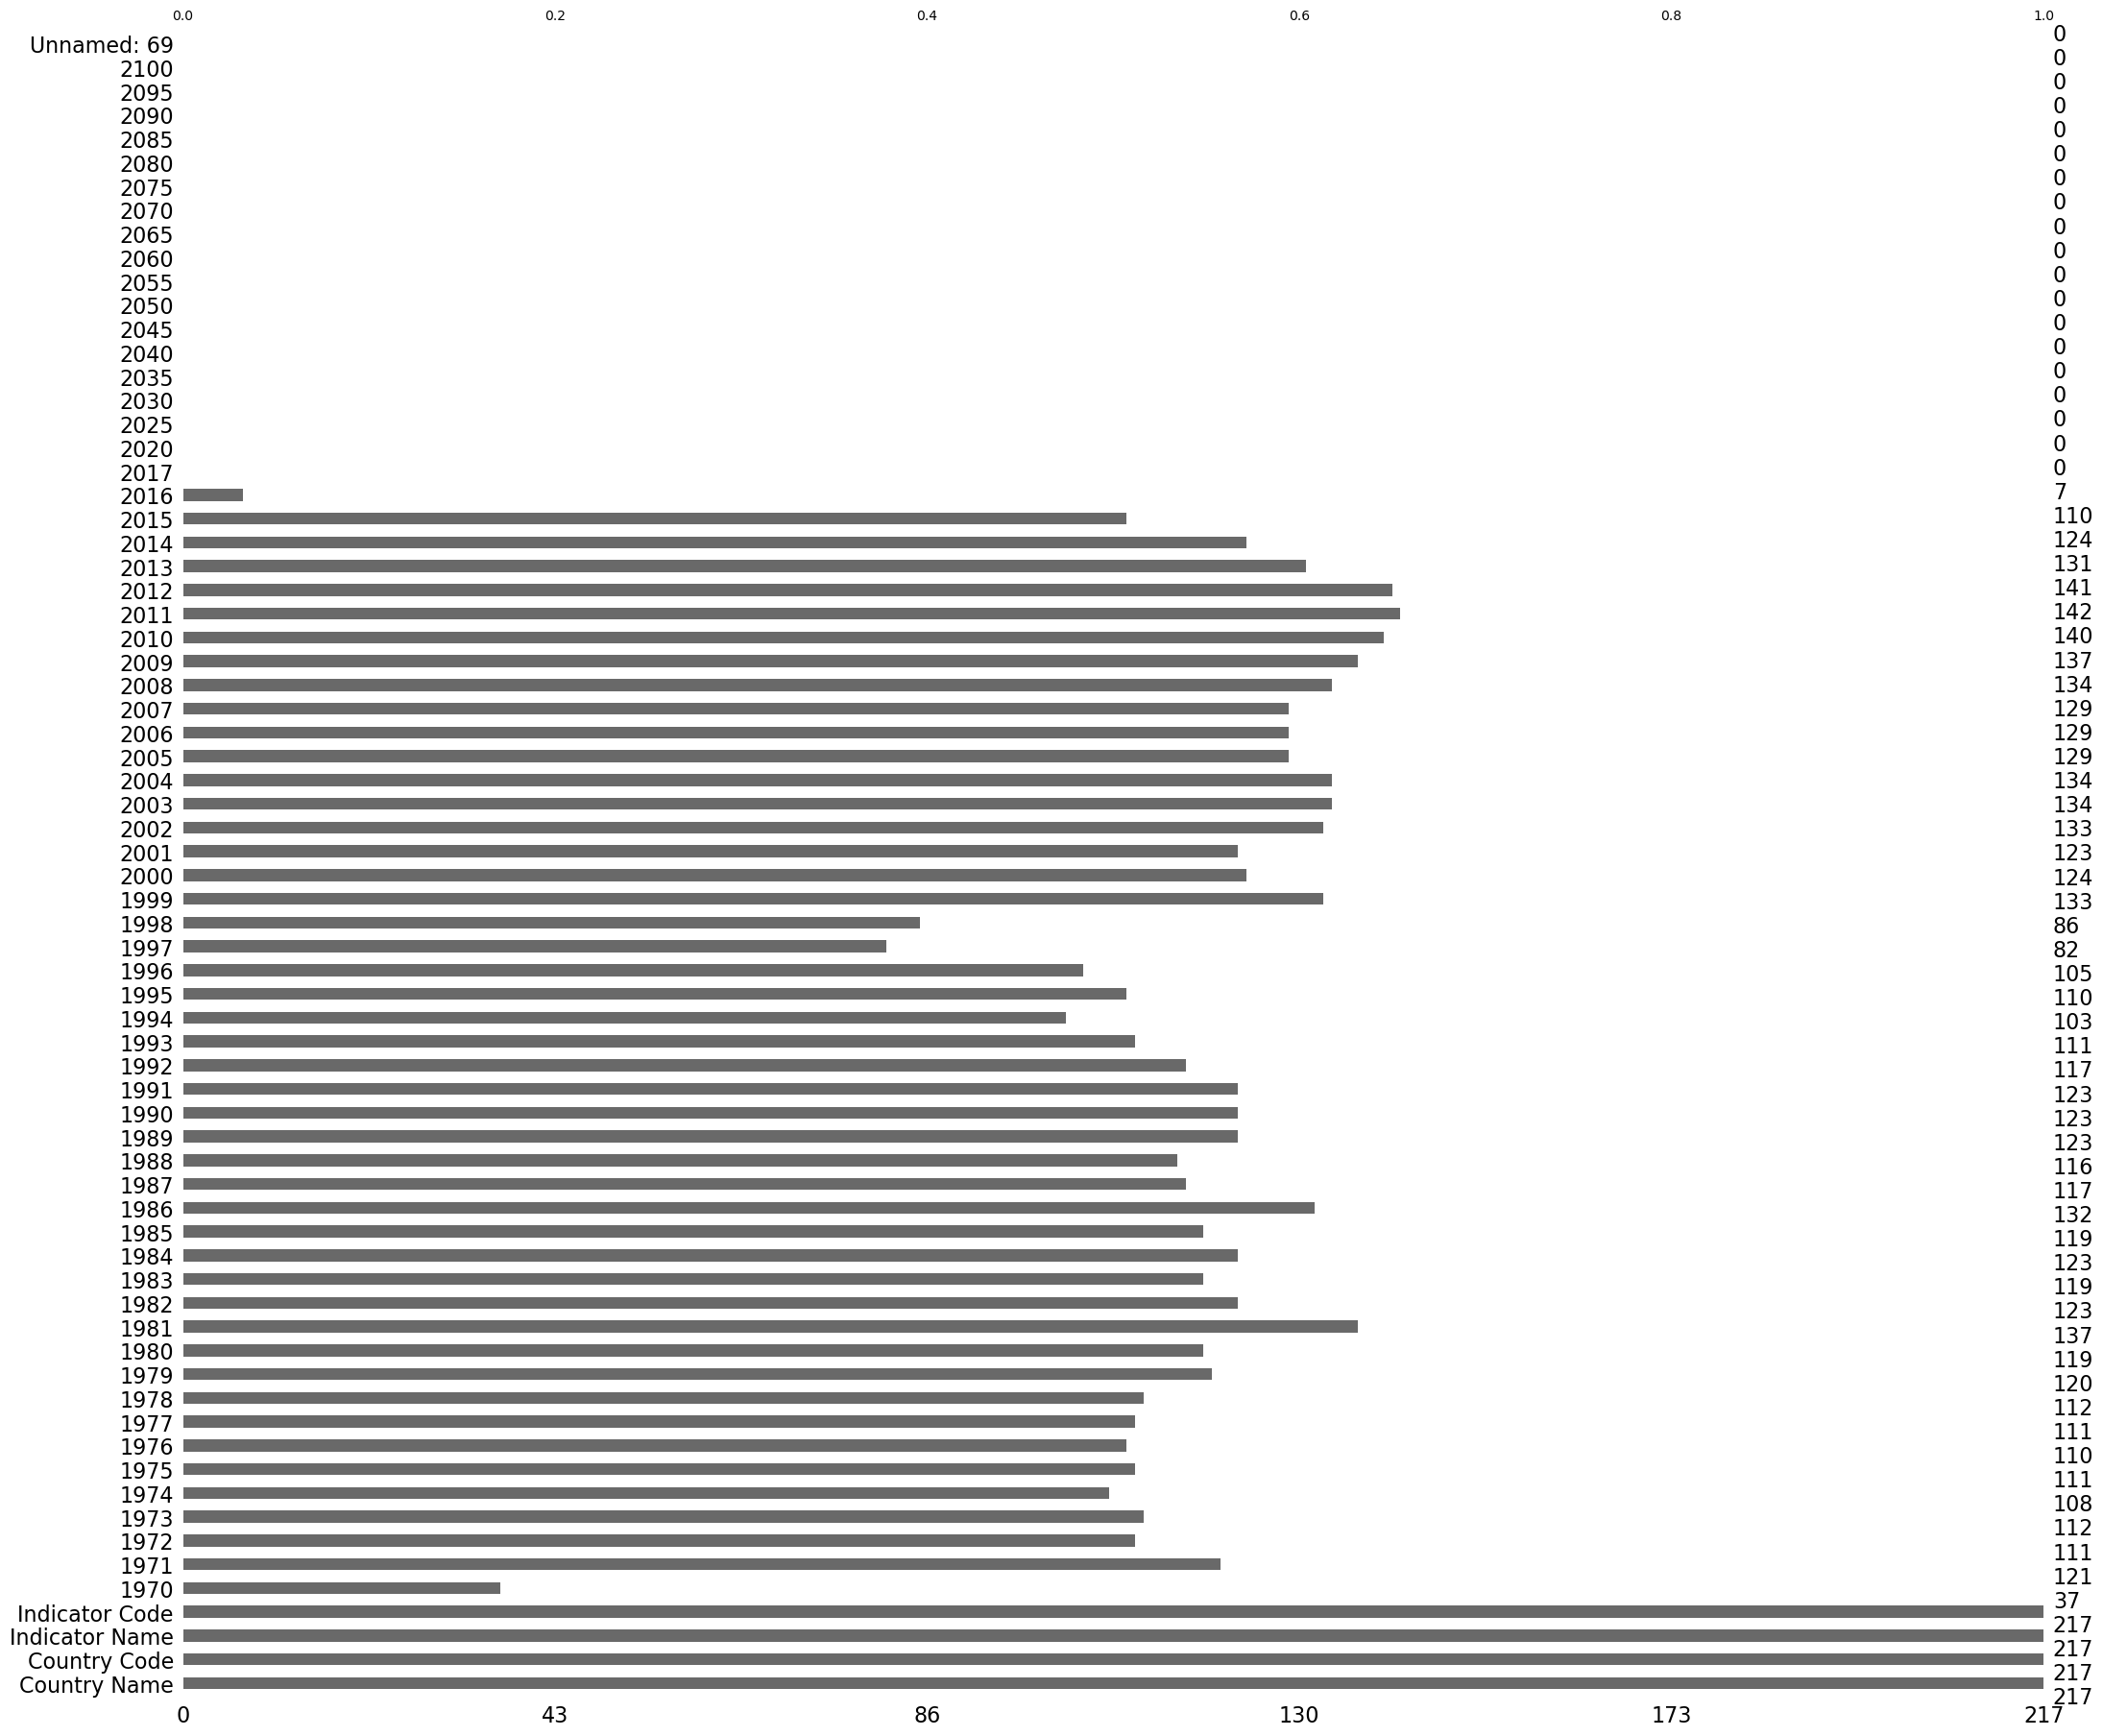

In [63]:
msno.bar(edStatsData_SE_TER_ENRL_df_country_keep_seuil)

- les pays où les Inscriptions dans l'enseignement supérieur, tous programmes confondus sont nulles

In [64]:
mask_edStatsData_SE_TER_ENRL_df_country_keep_seuil = edStatsData_SE_TER_ENRL_df_country_keep_seuil['2014'].isna()
edStatsData_SE_TER_ENRL_df_country_keep_seuil[mask_edStatsData_SE_TER_ENRL_df_country_keep_seuil]["Country Name"]

103824           American Samoa
111154                   Angola
114819      Antigua and Barbuda
140474             Bahamas, The
151469                 Barbados
                  ...          
862479            Venezuela, RB
869809    Virgin Islands (U.S.)
877139              Yemen, Rep.
880804                   Zambia
884469                 Zimbabwe
Name: Country Name, Length: 93, dtype: object

<AxesSubplot:ylabel='Frequency'>

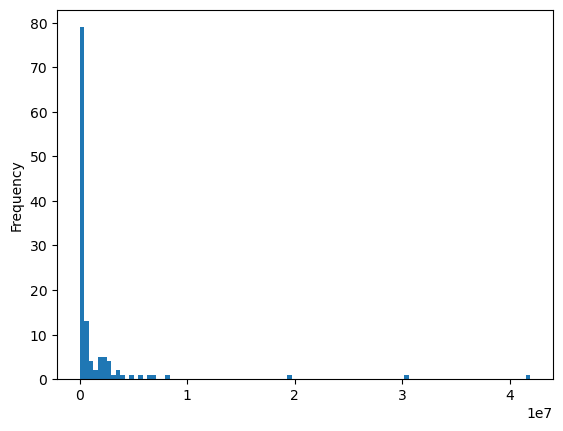

In [65]:
#L'histogramme qui représente ce dataframe en 2014
edStatsData_SE_TER_ENRL_df_country_keep_seuil['2014'].plot(kind='hist', bins=100)

- Retenons un nombre de pays à la base d'un seuil de cette population (<span style="color: blue;">SE.TER.ENRL</span>)

In [66]:
# définissons un seul qui représente la moyenne de cette population (SP.TER.TOTL.IN) en 2014
seuil = edStatsData_SE_TER_ENRL_df_country_keep_seuil["2014"].mean()
# les pays qui ont leur population plus grand que le seuil en 2014
edStatsData_SE_TER_ENRL_df_country_keep_seuil[edStatsData_SE_TER_ENRL_df_country_keep_seuil["2014"] > seuil]["Country Name"]

118484             Argentina
147804            Bangladesh
188119                Brazil
243094                 China
246759              Colombia
305399      Egypt, Arab Rep.
338384                France
356709               Germany
415349                 India
419014             Indonesia
422679    Iran, Islamic Rep.
441004                 Italy
448334                 Japan
470324           Korea, Rep.
558284                Mexico
635249              Pakistan
657239           Philippines
660904                Poland
679229    Russian Federation
745199                 Spain
796509              Thailand
818499                Turkey
836824               Ukraine
844154        United Kingdom
847819         United States
866144               Vietnam
Name: Country Name, dtype: object

Cet indicateur (<span style="color: blue;">SE.TER.ENRL</span>) nous permet de retenir ces 26 pays ci-dessus

### 3.7. Taux brut de scolarisation dans l'enseignement supérieur, les deux sexes (%), basés sur l'indicateur <span style="color: blue;"> SE.TER.ENRR</span>

In [67]:
edStatsData_SE_TER_ENRR_df = edStatsData_df.loc[edStatsData_df['Indicator Code'] == 'SE.TER.ENRR', :]
edStatsData_SE_TER_ENRR_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
1339,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,5.89729,5.890620,6.169500,6.531240,6.933240,7.47784,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5004,East Asia & Pacific,EAS,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,3.15454,3.047160,3.155800,3.243450,3.513950,3.81330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8669,East Asia & Pacific (excluding high income),EAP,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,1.43412,1.420270,1.454670,1.507370,1.694380,1.89410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12334,Euro area,EMU,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,19.55237,19.554770,20.624729,21.935209,22.715361,23.78504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15999,Europe & Central Asia,ECS,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,24.66592,24.626841,24.934799,25.362329,25.662979,26.24436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Retirons les unions de pays du dataframe de cette population

In [68]:
# application du mask sur cette population (SE.TER.ENRR)
mask_edStatsData_SE_TER_ENRR_df_country_keep_seuil = edStatsData_SE_TER_ENRR_df['Country Name'].isin(liste_pays)
edStatsData_SE_TER_ENRR_df[mask_edStatsData_SE_TER_ENRR_df_country_keep_seuil]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
92964,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,0.76817,0.92394,0.95241,1.09745,1.02620,1.08012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96629,Albania,ALB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,13.90859,14.92861,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100294,Algeria,DZA,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103959,American Samoa,ASM,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107624,Andorra,AND,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869944,Virgin Islands (U.S.),VIR,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873609,West Bank and Gaza,PSE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877274,"Yemen, Rep.",YEM,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880939,Zambia,ZMB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,0.39227,NaN,NaN,NaN,1.13517,1.96719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
edStatsData_SE_TER_ENRR_df_country_keep_seuil = edStatsData_SE_TER_ENRR_df[mask_edStatsData_SE_TER_ENRR_df_country_keep_seuil]

<AxesSubplot:>

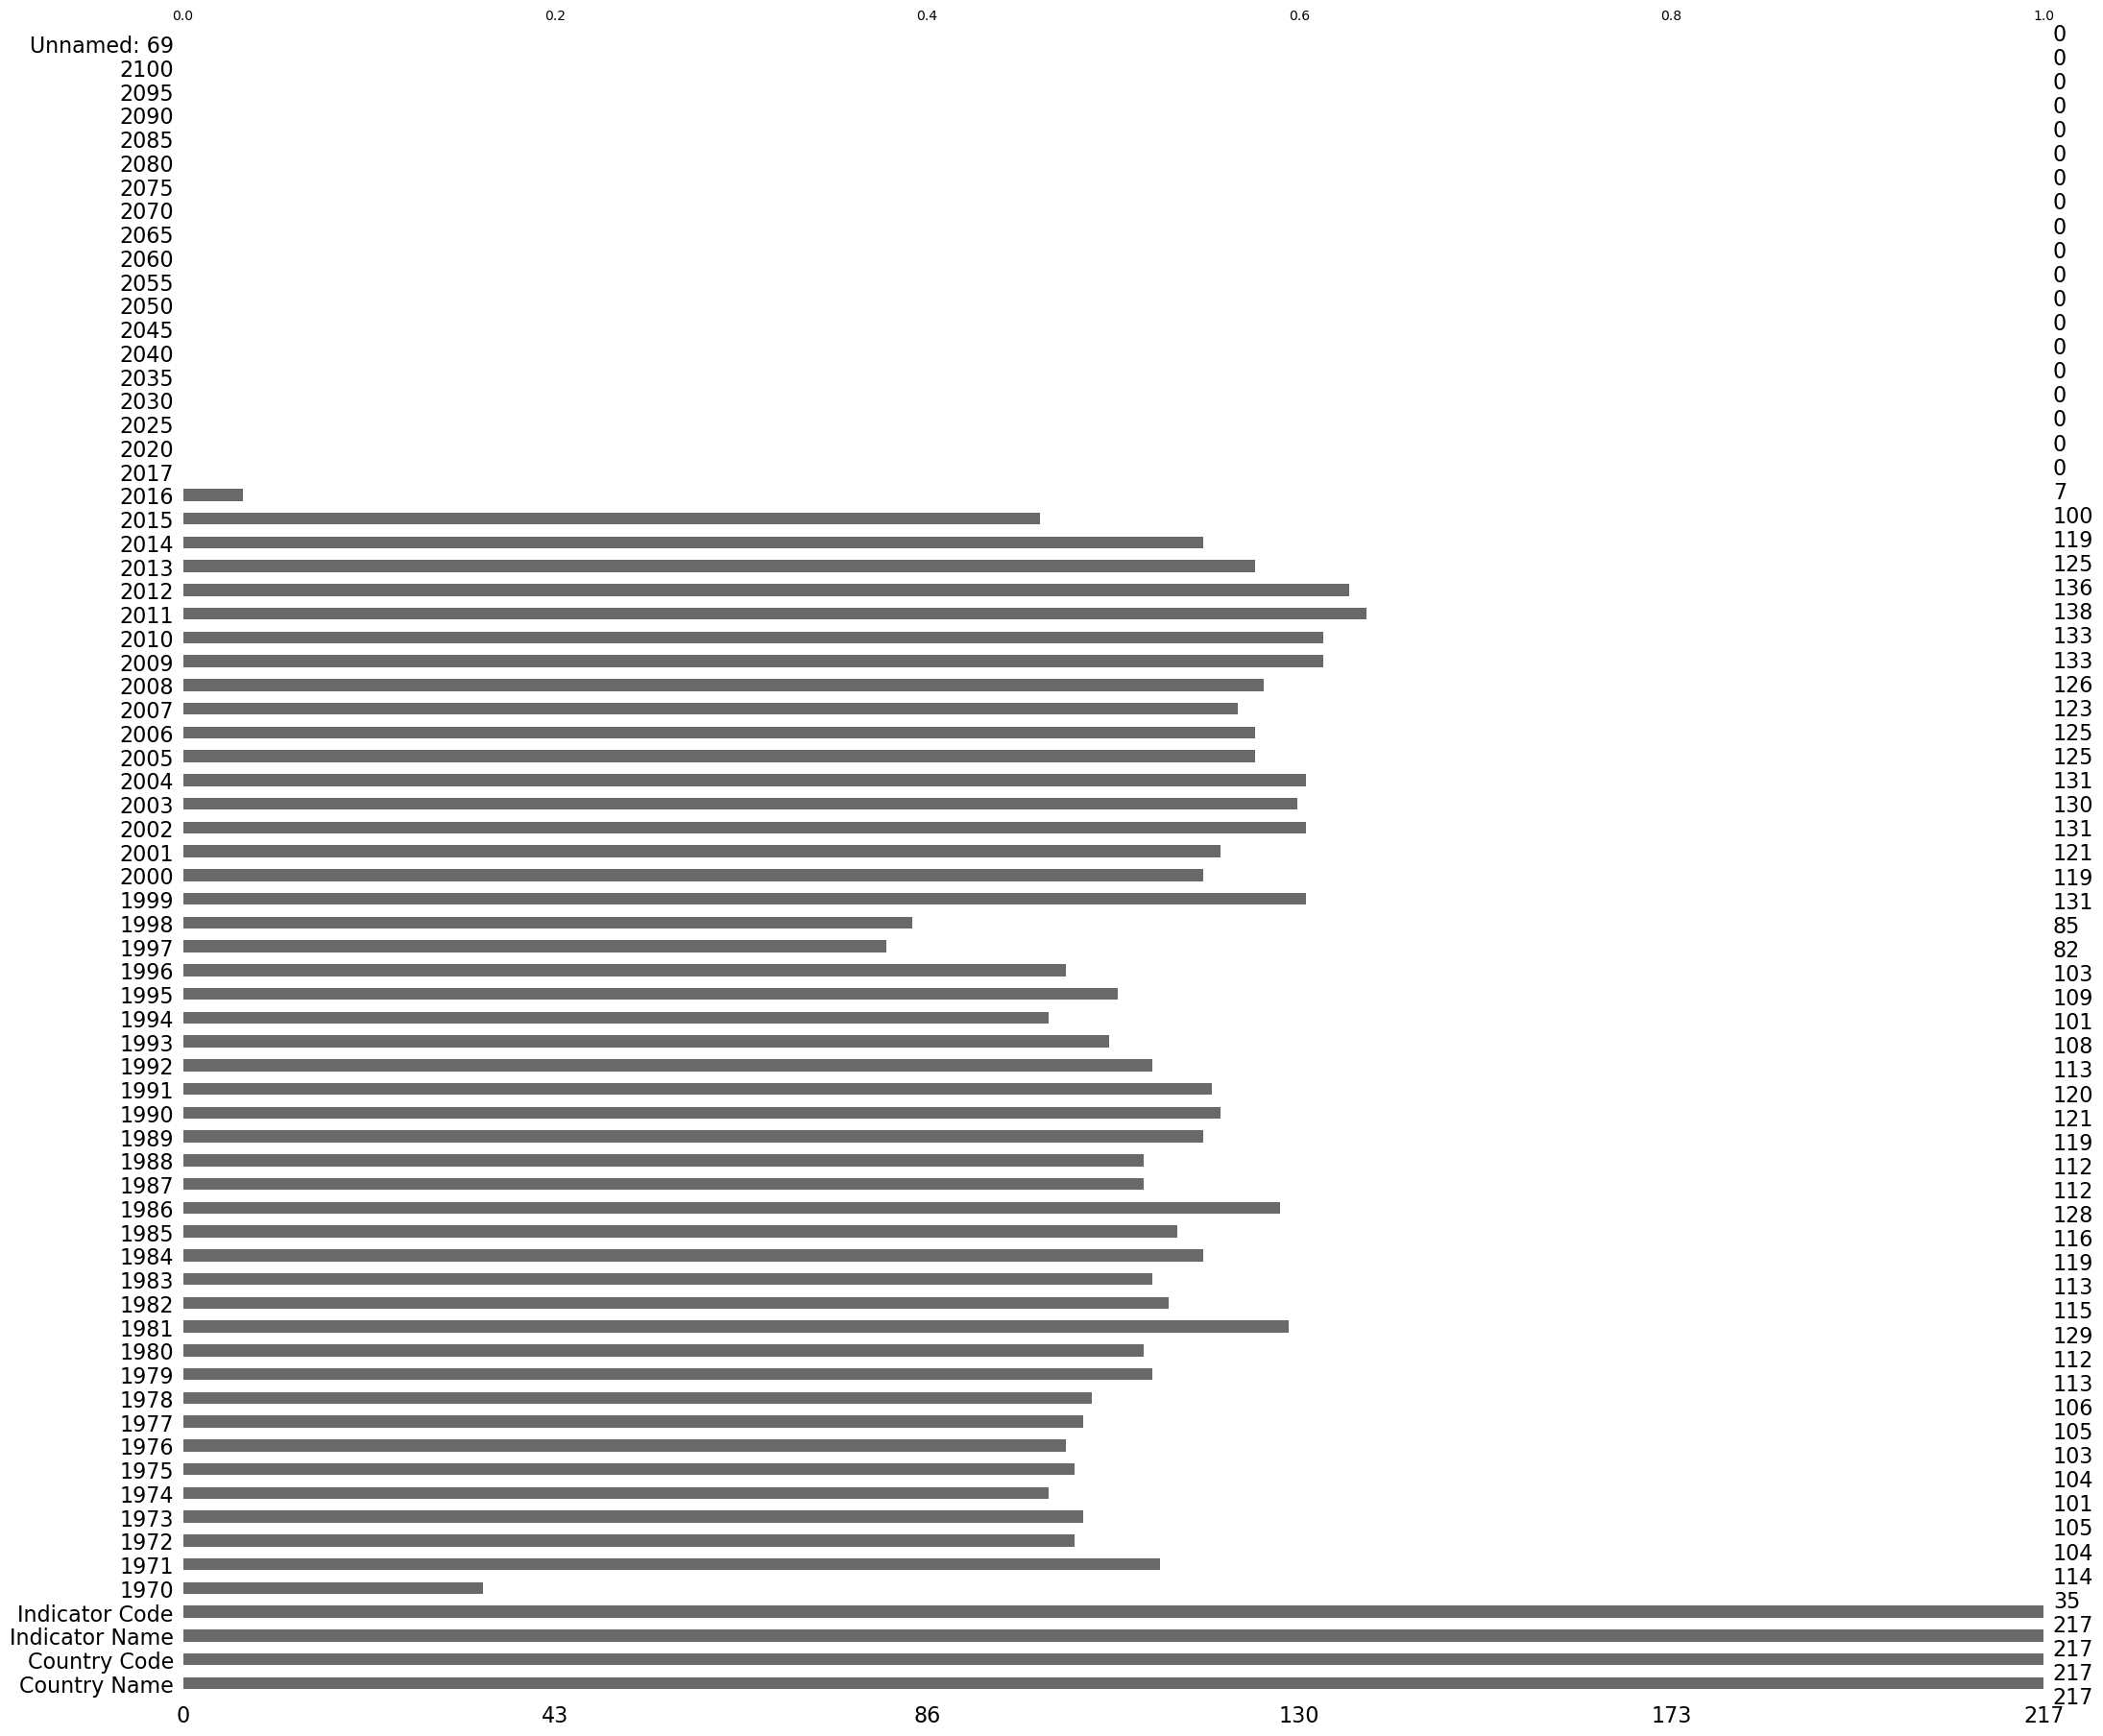

In [70]:
msno.bar(edStatsData_SE_TER_ENRR_df_country_keep_seuil)

- les pays où les taux brut de scolarisation dans l'enseignement supérieur sont nuls

In [71]:
mask_edStatsData_SE_TER_ENRR_df_country_keep_seuil = edStatsData_SE_TER_ENRR_df_country_keep_seuil['2014'].isna()
edStatsData_SE_TER_ENRR_df_country_keep_seuil[mask_edStatsData_SE_TER_ENRR_df_country_keep_seuil]["Country Name"]

103959           American Samoa
107624                  Andorra
111289                   Angola
114954      Antigua and Barbuda
140609             Bahamas, The
                  ...          
862614            Venezuela, RB
869944    Virgin Islands (U.S.)
877274              Yemen, Rep.
880939                   Zambia
884604                 Zimbabwe
Name: Country Name, Length: 98, dtype: object

<AxesSubplot:ylabel='Frequency'>

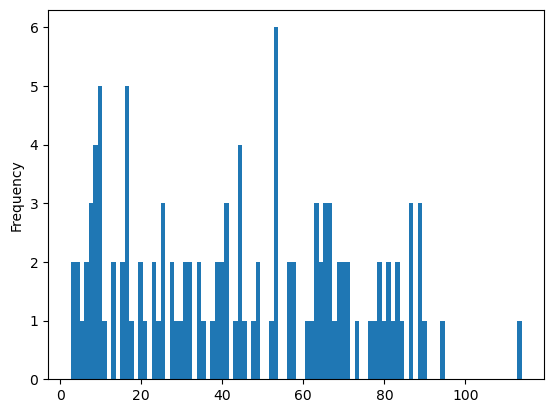

In [72]:
#L'histogramme qui représente ce dataframe en 2014
edStatsData_SE_TER_ENRR_df_country_keep_seuil['2014'].plot(kind='hist', bins=100)

- Retenons un nombre de pays à la base d'un seuil de cette population (<span style="color: blue;">SE.TER.ENRR</span>)

In [73]:
# définissons un seul qui représente la moyenne de cette population (SP.TER.TOTL.IN) en 2014
seuil = edStatsData_SE_TER_ENRR_df_country_keep_seuil["2014"].mean()
# les pays qui ont leur population plus grand que le seuil en 2014
edStatsData_SE_TER_ENRR_df_country_keep_seuil[edStatsData_SE_TER_ENRR_df_country_keep_seuil["2014"] > seuil]["Country Name"]

96629                  Albania
118619               Argentina
129614               Australia
133279                 Austria
155269                 Belarus
158934                 Belgium
188254                  Brazil
199249                Bulgaria
239564                   Chile
246894                Colombia
261554              Costa Rica
268884                 Croatia
279879                  Cyprus
283544          Czech Republic
287209                 Denmark
298204      Dominican Republic
320194                 Estonia
334854                 Finland
338519                  France
356844                 Germany
367839                  Greece
404489    Hong Kong SAR, China
408154                 Hungary
422814      Iran, Islamic Rep.
430144                 Ireland
437474                  Israel
441139                   Italy
448469                   Japan
455799              Kazakhstan
470459             Korea, Rep.
481454         Kyrgyz Republic
488784                  Latvia
510774  

Cet indicateur (<span style="color: blue;">SE.TER.ENRR</span>) nous permet de retenir ces 57 pays ci-dessus

### 3.8. Utilisateurs d'Internet basés sur l'indicateur <span style="color: blue;"> IT.NET.USER.P2</span>

In [74]:
edStatsData_IT_NET_USER_P2_df = edStatsData_df.loc[edStatsData_df['Indicator Code'] == 'IT.NET.USER.P2', :]
edStatsData_IT_NET_USER_P2_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5040,East Asia & Pacific,EAS,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8705,East Asia & Pacific (excluding high income),EAP,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12370,Euro area,EMU,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16035,Europe & Central Asia,ECS,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Retirons les unions de pays du dataframe de cette population

In [75]:
# application du mask sur cette population (IT.NET.USER.P2)
mask_edStatsData_IT_NET_USER_P2_df_country_keep_seuil = edStatsData_IT_NET_USER_P2_df['Country Name'].isin(liste_pays)
edStatsData_IT_NET_USER_P2_df[mask_edStatsData_IT_NET_USER_P2_df_country_keep_seuil]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96665,Albania,ALB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100330,Algeria,DZA,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103995,American Samoa,ASM,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107660,Andorra,AND,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869980,Virgin Islands (U.S.),VIR,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873645,West Bank and Gaza,PSE,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877310,"Yemen, Rep.",YEM,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880975,Zambia,ZMB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
edStatsData_IT_NET_USER_P2_df_country_keep_seuil = edStatsData_IT_NET_USER_P2_df[mask_edStatsData_IT_NET_USER_P2_df_country_keep_seuil]

<AxesSubplot:>

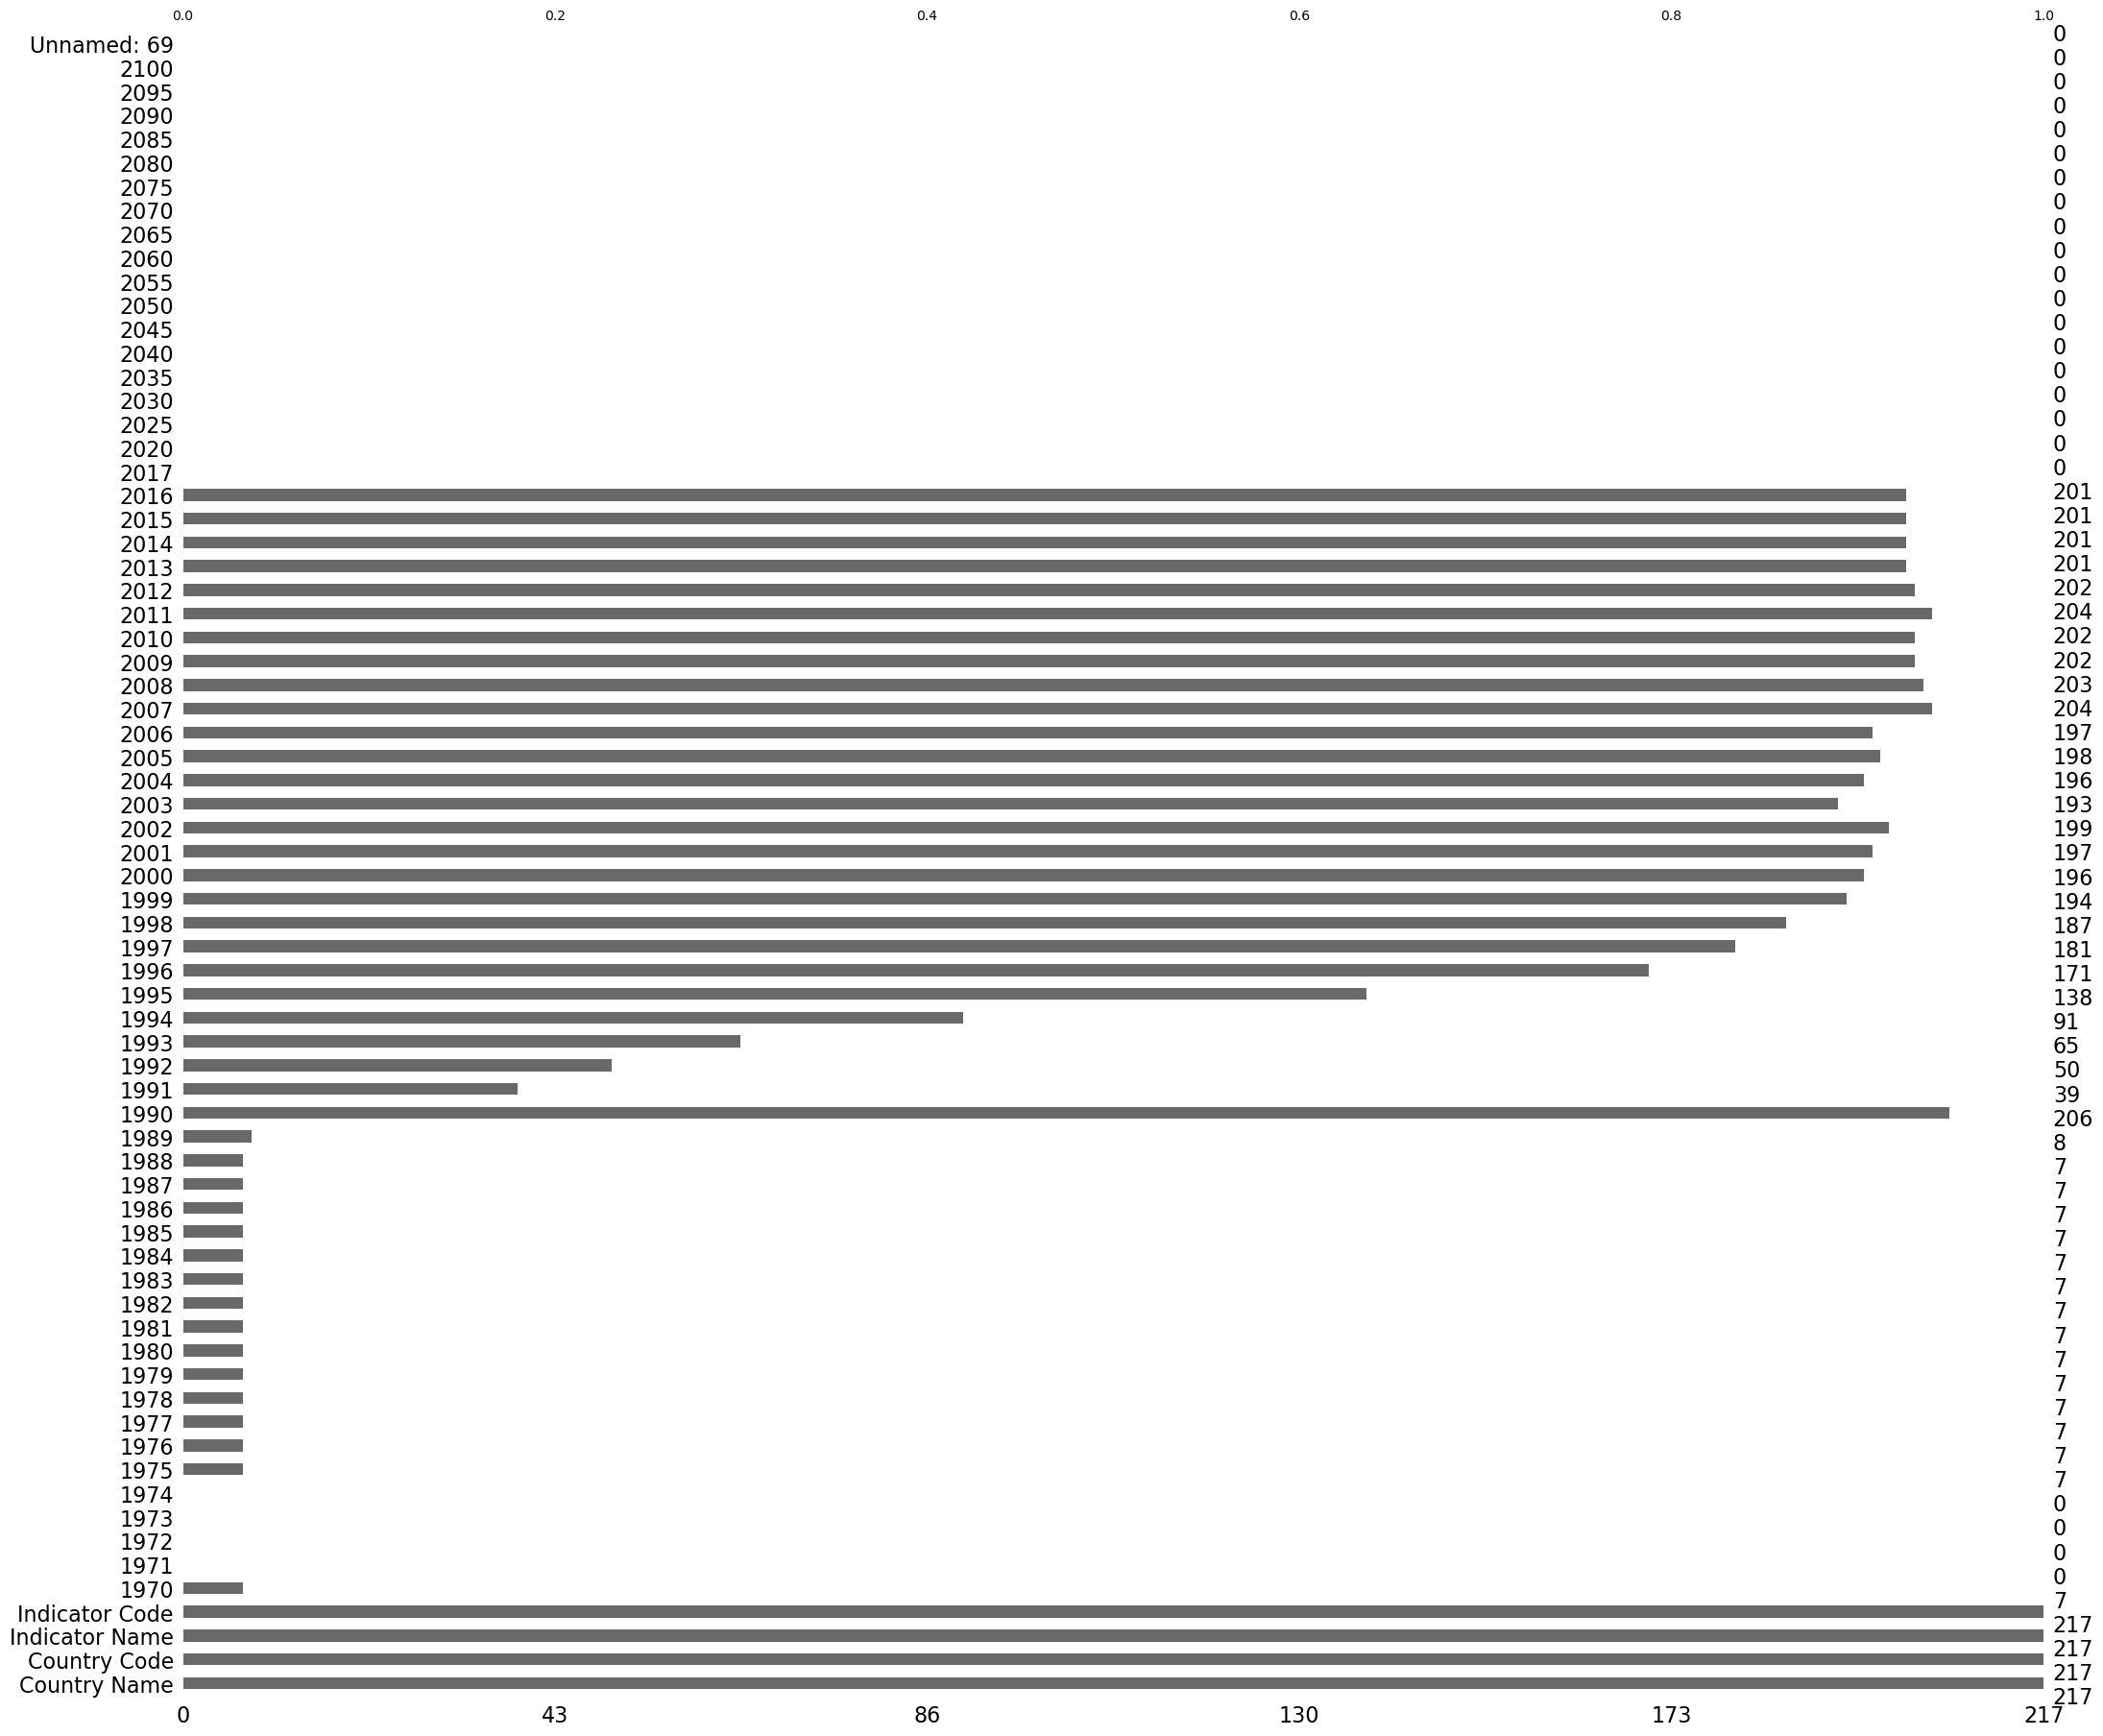

In [77]:
msno.bar(edStatsData_IT_NET_USER_P2_df_country_keep_seuil)

- les pays où nous avons pas de données pour les utilisateurs d'Internet

In [78]:
mask_edStatsData_IT_NET_USER_P2_df_country_keep_seuil = edStatsData_IT_NET_USER_P2_df_country_keep_seuil['2014'].isna()
edStatsData_IT_NET_USER_P2_df_country_keep_seuil[mask_edStatsData_IT_NET_USER_P2_df_country_keep_seuil]["Country Name"]

103995               American Samoa
191955       British Virgin Islands
235935              Channel Islands
276250                      Curacao
364210                    Gibraltar
433845                  Isle of Man
466830    Korea, Dem. People’s Rep.
474160                       Kosovo
595105                        Nauru
624425     Northern Mariana Islands
639085                        Palau
690395                   San Marino
719715    Sint Maarten (Dutch part)
741705                  South Sudan
760030     St. Martin (French part)
826000     Turks and Caicos Islands
Name: Country Name, dtype: object

<AxesSubplot:ylabel='Frequency'>

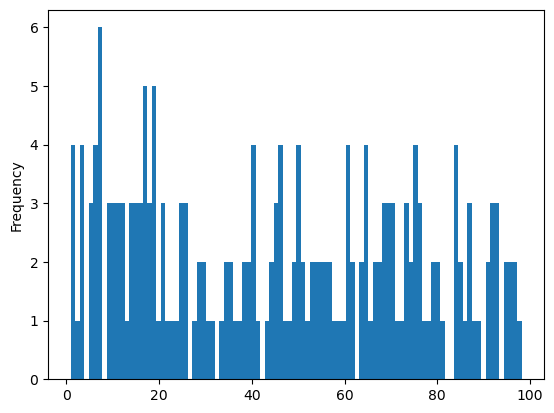

In [79]:
#L'histogramme qui représente ce dataframe en 2014
edStatsData_IT_NET_USER_P2_df_country_keep_seuil['2014'].plot(kind='hist', bins=100)

- Retenons un nombre de pays à la base d'un seuil de cette population (<span style="color: blue;">IT.NET.USER.P2</span>)

In [80]:
# définissons un seul qui représente la moyenne de cette population (SP.TER.TOTL.IN) en 2014
seuil = edStatsData_IT_NET_USER_P2_df_country_keep_seuil["2014"].mean()
# les pays qui ont leur population plus grand que le seuil en 2014
edStatsData_IT_NET_USER_P2_df_country_keep_seuil[edStatsData_IT_NET_USER_P2_df_country_keep_seuil["2014"] > seuil]["Country Name"]

96665                   Albania
107660                  Andorra
114990      Antigua and Barbuda
118655                Argentina
122320                  Armenia
                  ...          
847990            United States
851655                  Uruguay
862650            Venezuela, RB
869980    Virgin Islands (U.S.)
873645       West Bank and Gaza
Name: Country Name, Length: 102, dtype: object

Cet indicateur (<span style="color: blue;">IT.NET.USER.P2</span>) nous permet de retenir ces 102 pays ci-dessus

- <span style="color: green;">Traitement des valeurs manquantes pour une variable (année 2014) en utilisant le dataframe des utilisateurs du net</span>

Remplaçons les valeurs manquantes de la variable par la moyenne.

In [81]:
edStatsData_IT_NET_USER_P2_df.loc[edStatsData_IT_NET_USER_P2_df['2014'].isna(), '2014'] = edStatsData_IT_NET_USER_P2_df['2014'].mean()

<span style="color: green;">J'avais cette possibilité de remplacer mes valeurs manquantes dans l'ensemble de mes traitements antérieurs. J'ai pas trouvé utile de le faire car j'ai choisi les pays qui ont une valeur au dessus de la moyenne.</span>

## 4. Analyse des indicteurs retenus

4.1. Les indicateurs retenus

- La population
  - <span style="color: blue;">SP.POP.TOTL</span>

- L'enseignement secondaire 
  - <span style="color: blue;">SE.SEC.ENRR</span> 

- L'enseignement supérieur 
  - <span style="color: blue;">SE.TER.ENRR</span>

- Utilisation d'internet 
  - <span style="color: blue;">IT.NET.USER.P2</span>

4.2. Filtrage avec les indicateurs retenus

In [82]:
mask_country_keep = edStatsData_df['Country Name'].isin(liste_pays)
edStatsData_df[mask_country_keep]

# dataframe des pays retenus
edStatsData_df_country_keep = edStatsData_df[mask_country_keep]

# Liste des indicateurs retenus
indicators_keep = ['SP.POP.TOTL','SE.SEC.ENRR','SE.TER.ENRR','IT.NET.USER.P2']

# On ne conserve que les lignes donnant des informations sur les indicateurs retenus
edStatsData_df_country_keep = edStatsData_df_country_keep[edStatsData_df_country_keep['Indicator Code'].isin(indicators_keep)]
edStatsData_df_country_keep

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
92960,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,8.331610e+00,9.350290e+00,1.034861e+01,1.083169e+01,1.097640e+01,1.104103e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92964,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,7.681700e-01,9.239400e-01,9.524100e-01,1.097450e+00,1.026200e+00,1.080120e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94158,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1.112612e+07,1.141782e+07,1.172194e+07,1.202782e+07,1.232154e+07,1.259029e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96625,Albania,ALB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882133,Zambia,ZMB,"Population, total",SP.POP.TOTL,4.173928e+06,4.317748e+06,4.469895e+06,4.629402e+06,4.794754e+06,4.964831e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884600,Zimbabwe,ZWE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,7.381360e+00,7.567980e+00,8.159130e+00,8.376400e+00,8.422430e+00,8.684790e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884604,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,1.718440e+00,1.668860e+00,1.673130e+00,1.548440e+00,1.584170e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4.3. Analyses des indicateurs à l'aide de graphiques statistiques

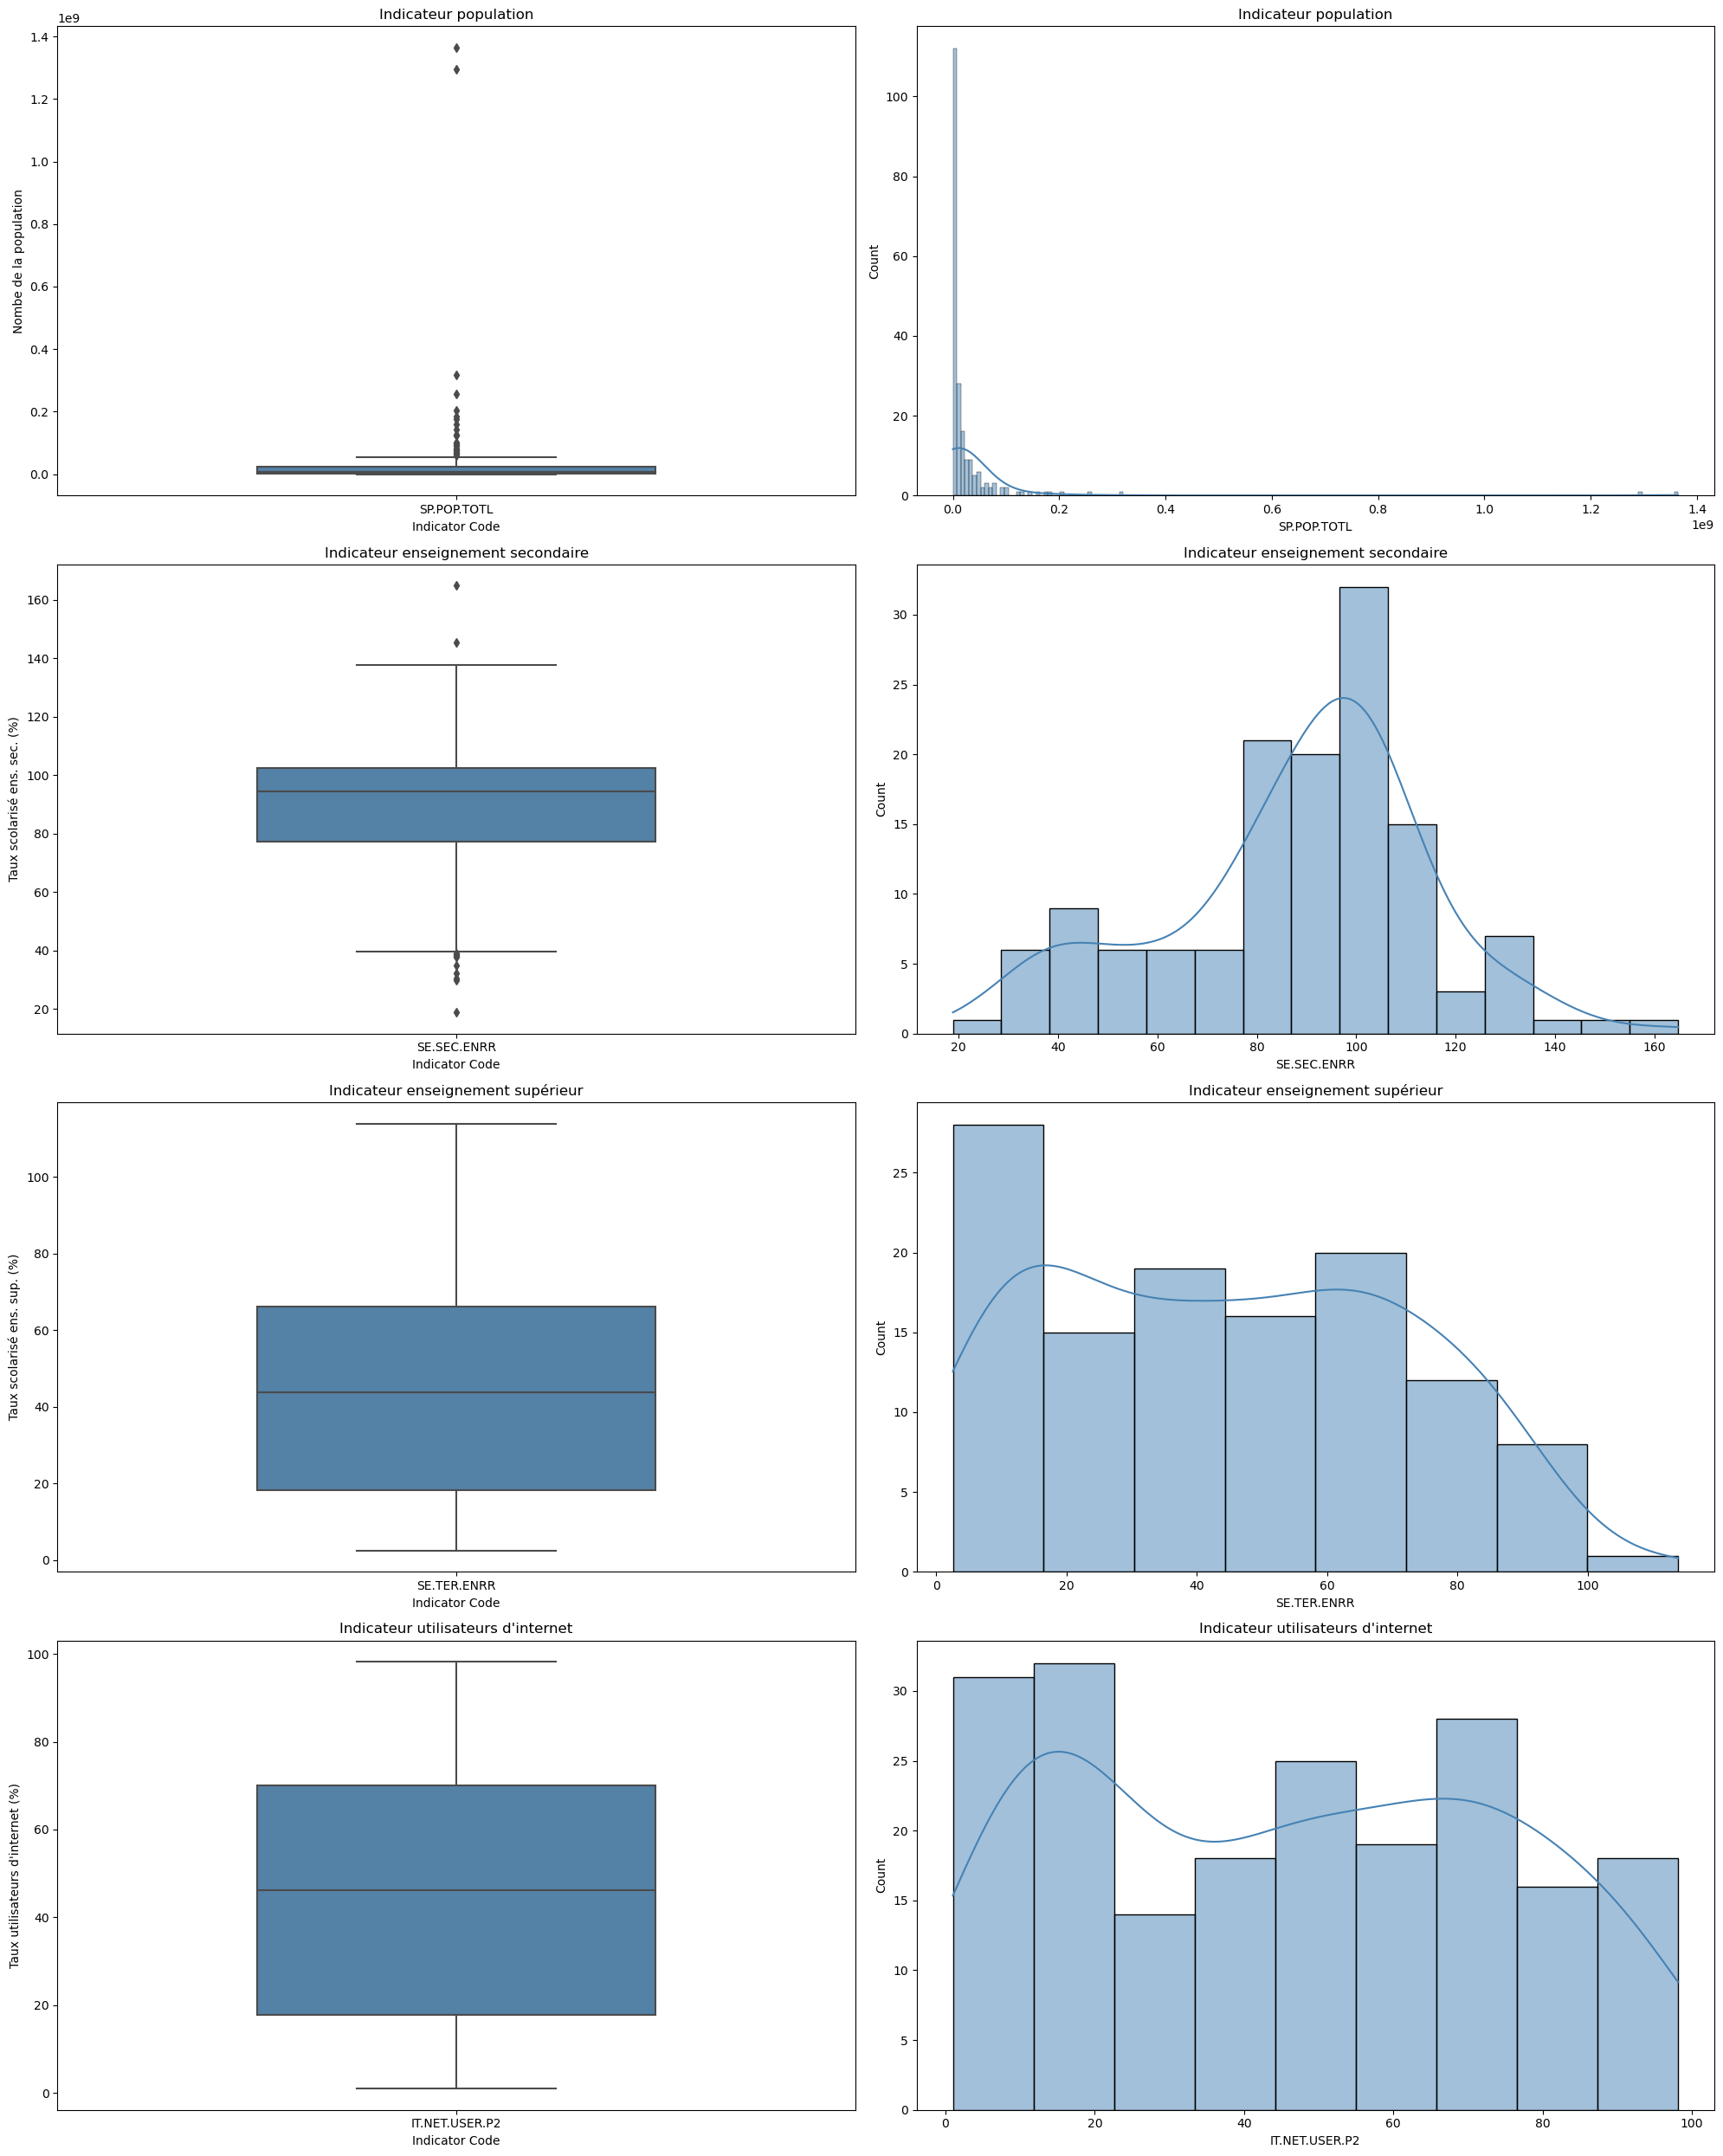

In [83]:
plt.figure(figsize = (20, 25))

# Indicateur de la population totale (SP.POP.TOTL)
edStatsData_SP_POP_TOTL_df_r = edStatsData_df_country_keep[edStatsData_df_country_keep['Indicator Code'] == 'SP.POP.TOTL']

plt.subplot(4,2,1)
sns.boxplot( x=edStatsData_SP_POP_TOTL_df_r['Indicator Code'], y=edStatsData_SP_POP_TOTL_df_r['2014'], width=0.5, color='SteelBlue')
plt.title('Indicateur population')
plt.ylabel('Nombe de la population')

plt.subplot(4,2,2)
sns.histplot(edStatsData_SP_POP_TOTL_df_r['2014'], kde = True, color='SteelBlue')
plt.title('Indicateur population')
plt.xlabel('SP.POP.TOTL')




#Indicateur de l'enseignement secondaire (SE.SEC.ENRR)
edStatsData_SE_SEC_ENRR_df_r=edStatsData_df_country_keep[edStatsData_df_country_keep['Indicator Code'] == 'SE.SEC.ENRR']

plt.subplot(4,2,3)
sns.boxplot( x=edStatsData_SE_SEC_ENRR_df_r['Indicator Code'], y=edStatsData_SE_SEC_ENRR_df_r['2014'], width=0.5, color='SteelBlue')
plt.title('Indicateur enseignement secondaire')
plt.ylabel('Taux scolarisé ens. sec. (%)')

plt.subplot(4,2,4)
sns.histplot(edStatsData_SE_SEC_ENRR_df_r['2014'], kde = True, color='SteelBlue')
plt.title('Indicateur enseignement secondaire')
plt.xlabel('SE.SEC.ENRR')




#Indicateur de l'enseignement supérieur (SE.TER.ENRR)
edStatsData_SE_TER_ENRR_df_r=edStatsData_df_country_keep[edStatsData_df_country_keep['Indicator Code'] == 'SE.TER.ENRR']

plt.subplot(4,2,5)
sns.boxplot( x=edStatsData_SE_TER_ENRR_df_r['Indicator Code'], y=edStatsData_SE_TER_ENRR_df_r['2014'], width=0.5, color='SteelBlue')
plt.title('Indicateur enseignement supérieur')
plt.ylabel('Taux scolarisé ens. sup. (%)')

plt.subplot(4,2,6)
sns.histplot(edStatsData_SE_TER_ENRR_df_r['2014'], kde = True, color='SteelBlue')
plt.title('Indicateur enseignement supérieur')
plt.xlabel('SE.TER.ENRR')




#Indicateur d'utilisateur d'internet (IT.NET.USER.P2)
edStatsData_IT_NET_USER_P2_df_r=edStatsData_df_country_keep[edStatsData_df_country_keep['Indicator Code'] == 'IT.NET.USER.P2']

plt.subplot(4,2,7)
sns.boxplot( x=edStatsData_IT_NET_USER_P2_df_r['Indicator Code'], y=edStatsData_IT_NET_USER_P2_df_r['2014'], width=0.5, color='SteelBlue')
plt.title("Indicateur utilisateurs d'internet")
plt.ylabel("Taux utilisateurs d'internet (%)")

plt.subplot(4,2,8)
sns.histplot(edStatsData_IT_NET_USER_P2_df_r['2014'], kde = True, color='SteelBlue')
plt.title("Indicateur utilisateurs d'internet")
plt.xlabel('IT.NET.USER.P2')
plt.savefig('Graph_stat_for_analyse')

plt.tight_layout()

On remarque que Le taux de scolarisation dans l'enseignement supérieur est plus inégal entre les pays que le taux de scolarisation au niveau de l'enseignement secondaire.
Pour l'indicateur numérique, forme bimodale, on distingue 3 groupes de pays répartis autour de 20%, 65% et 85%.

## 5. Création de score en fonction des différents indicateurs

5.1. Constitution du dataframe pour établir un score

In [84]:
# on ne conserve que les 5 indicateurs basées sur les informations de 2014
df_score= edStatsData_df_country_keep.pivot_table(index=['Country Name'], columns="Indicator Code")['2014']
df_score

Indicator Code,IT.NET.USER.P2,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL
Country Name,,,,
Afghanistan,7.00000,55.656158,8.662800,32758020.0
Albania,60.10000,96.426086,62.706848,2889104.0
Algeria,29.50000,NaN,34.593811,39113313.0
American Samoa,NaN,NaN,NaN,55437.0
Andorra,95.90000,NaN,NaN,79223.0
...,...,...,...,...
Virgin Islands (U.S.),50.07000,NaN,NaN,104170.0
West Bank and Gaza,53.67000,82.240448,44.006870,4294682.0
"Yemen, Rep.",22.55000,NaN,NaN,26246327.0


5.2 Indicateurs manquants par pays

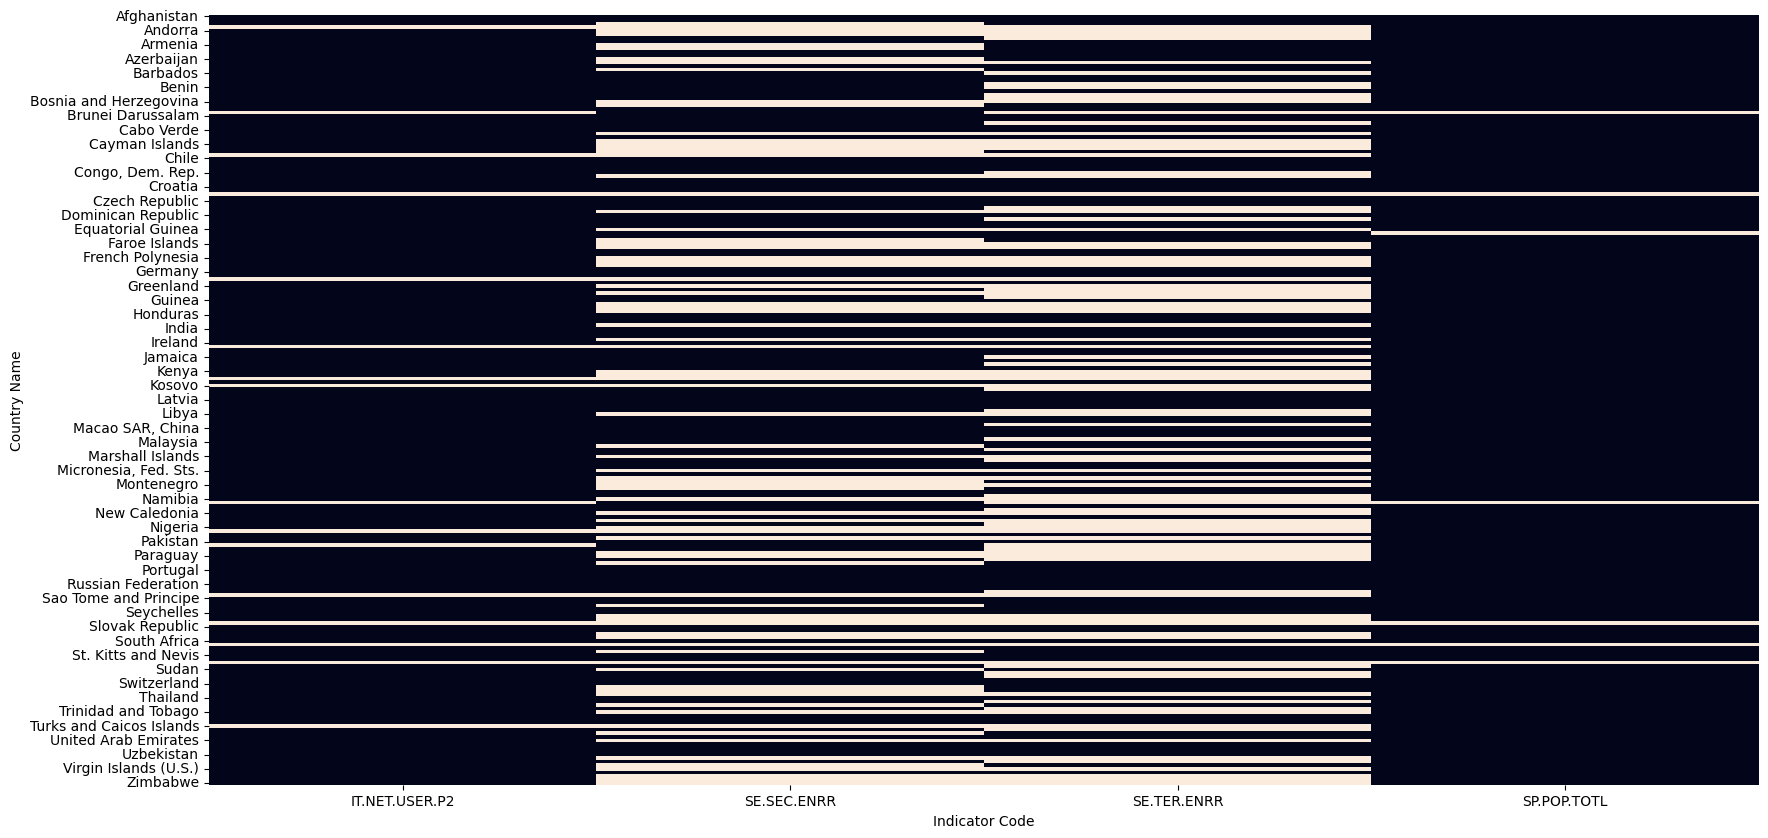

In [85]:
plt.figure(figsize=(20,10))
sns.heatmap(df_score.isna(), cbar=False)
plt.savefig('SCORE_MISSING_VALUES.png')
plt.show()  

<AxesSubplot:xlabel='Indicator Code'>

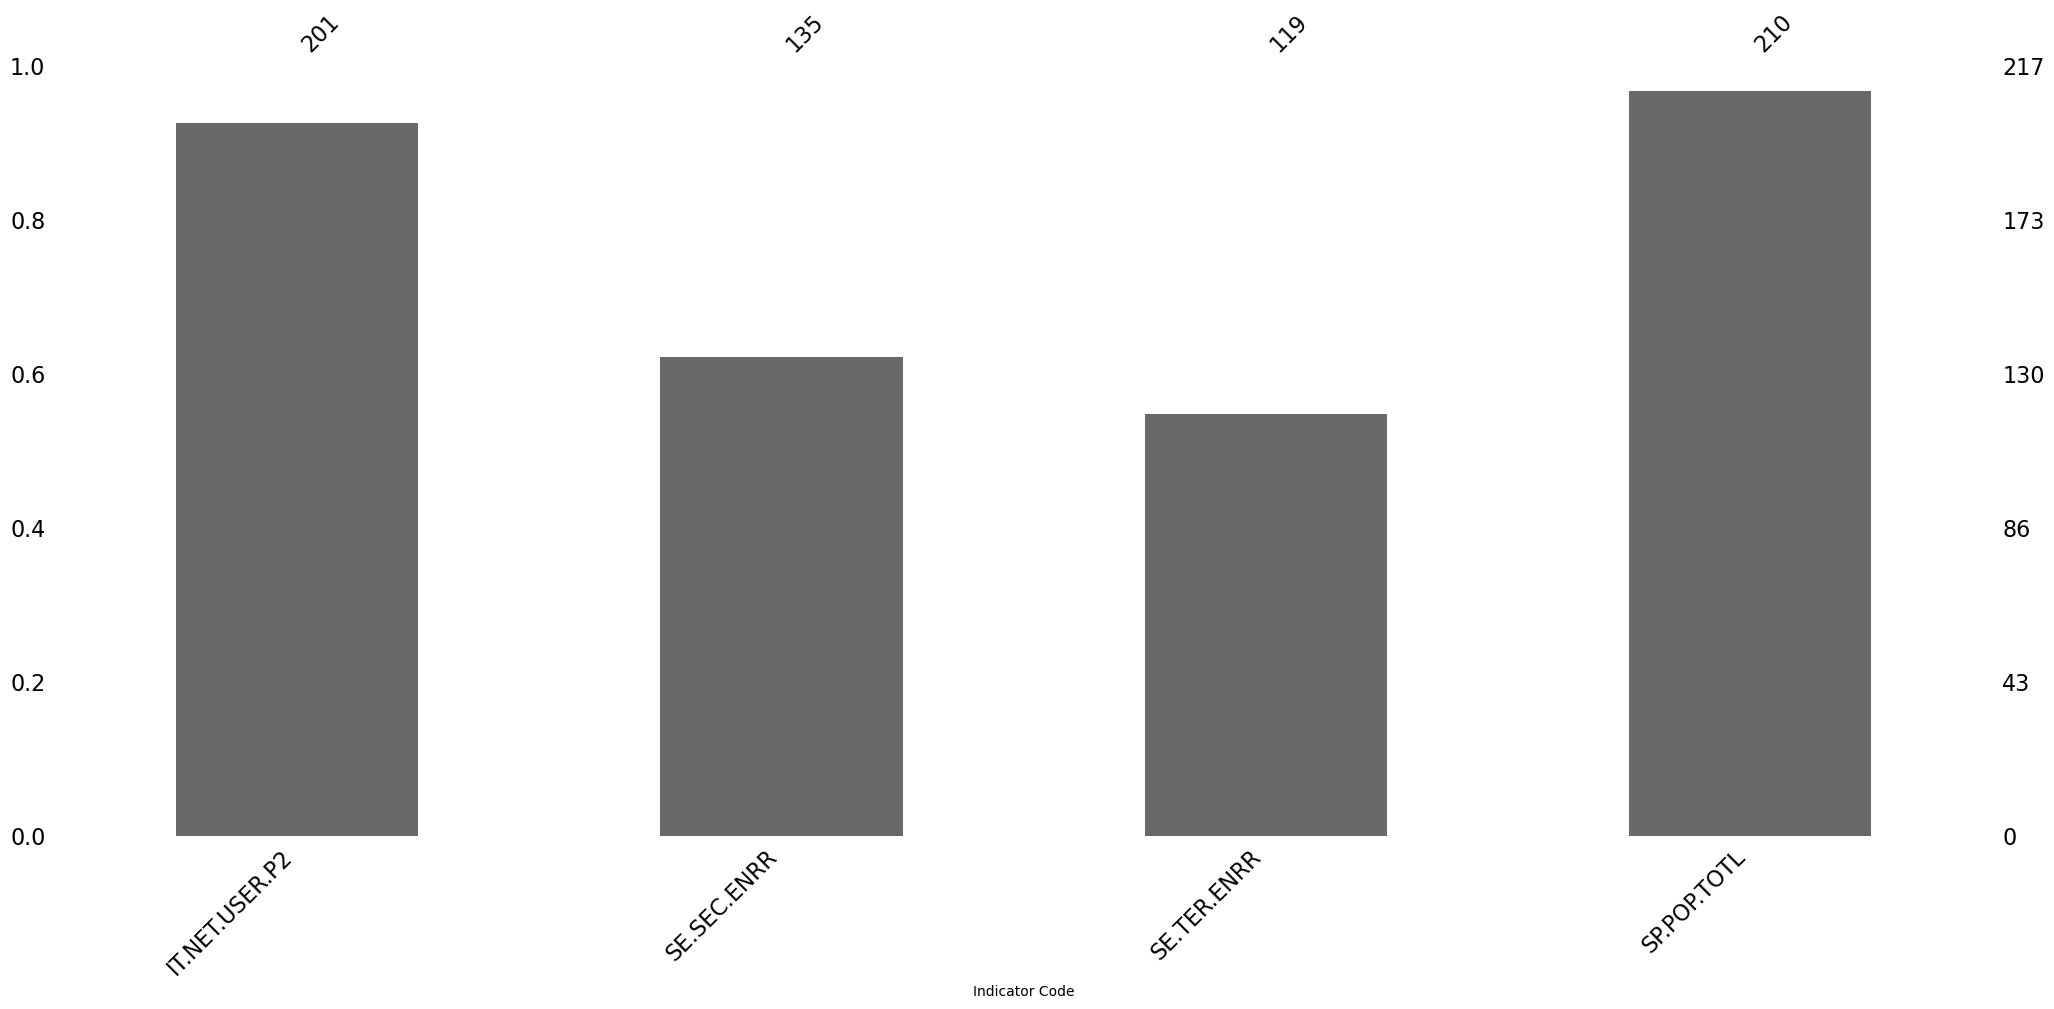

In [86]:
# La visualisation de ce dataframe score à l'aide de Missingo
msno.bar(df_score)

In [87]:
# Liste des pays avec au moins un indicateur manquant
pays_indic_manquant=df_score.notnull().sum(axis=1)
index_pays_indic_manquant=pays_indic_manquant[pays_indic_manquant<4].index
print(f'Nombre de pays à retirer : {len(index_pays_indic_manquant)}')
df_pays_retires=df_score.loc[index_pays_indic_manquant, :].sort_values(by='IT.NET.USER.P2', ascending=False)
df_pays_retires

Nombre de pays à retirer : 119


Indicator Code,IT.NET.USER.P2,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL
Country Name,,,,
Iceland,98.16,NaN,NaN,327386.0
Andorra,95.90,NaN,NaN,79223.0
Luxembourg,94.67,102.262459,NaN,556319.0
Faroe Islands,93.30,NaN,NaN,48842.0
Monaco,92.40,NaN,NaN,38132.0
...,...,...,...,...
San Marino,NaN,NaN,NaN,32657.0
Sint Maarten (Dutch part),NaN,NaN,NaN,NaN
South Sudan,NaN,NaN,NaN,NaN


In [88]:
# les pays avec les 4 indicateurs renseignés
df_score.dropna(thresh = 4, inplace=True)
print(f'Nombre de pays restant : {df_score.shape[0]}')

Nombre de pays restant : 98


In [89]:
df_score

Indicator Code,IT.NET.USER.P2,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL
Country Name,,,,
Afghanistan,7.000000,55.656158,8.662800,32758020.0
Albania,60.100000,96.426086,62.706848,2889104.0
Argentina,64.700000,106.777901,82.917389,42981515.0
Australia,84.000000,137.564789,90.306503,23460694.0
Austria,80.995825,99.296402,79.998642,8541575.0
...,...,...,...,...
United Kingdom,91.610000,127.811287,56.476768,64613160.0
United States,73.000000,97.564690,86.663963,318563456.0
Uruguay,61.460000,95.071861,56.344040,3419546.0


5.3. Création de score par indicateur et le dataframe regroupant la synthèse des scores

- Création d'une colonne SCORE_WEB contenant le score de l'indicateur <span style="color: blue;">IT.NET.USER.P2</span> 

In [90]:
df_score['SCORE_WEB'] = df_score['IT.NET.USER.P2'] / df_score['IT.NET.USER.P2'].max()

- Création d'une colonne SCORE_ENS_SEC contenant le score de l'indicateur <span style="color: blue;">SE.SEC.ENRR</span> 

In [91]:
df_score['SCORE_ENS_SEC'] = df_score['SE.SEC.ENRR'] / df_score['SE.SEC.ENRR'].max()

- Création d'une colonne SCORE_ENS_SUP contenant le score de l'indicateur <span style="color: blue;">SE.TER.ENRR</span> 

In [92]:
df_score['SCORE_ENS_SUP'] = df_score['SE.TER.ENRR'] / df_score['SE.TER.ENRR'].max()

- Création d'une colonne SCORE_POP contenant le score de l'indicateur <span style="color: blue;">SP.POP.TOTL</span> 

In [93]:
df_score['SCORE_POP'] = df_score['SP.POP.TOTL'] / df_score['SP.POP.TOTL'].max()

- Vérifions la relation entre les variables SCORE_WEB et SCORE_ENS_SEC en calculant corrélation linéaire entre les deux.

In [94]:
df_score[['SCORE_WEB', 'SCORE_ENS_SEC']].corr()

Indicator Code,SCORE_WEB,SCORE_ENS_SEC
Indicator Code,,
SCORE_WEB,1.00000,0.73659
SCORE_ENS_SEC,0.73659,1.00000


Nous pourrons donc conclure qu'il y a une forte corrélation entre les deux variables.

- Création d'un score total qui va faire la synthèse des 4 indicateurs
  - Application de poids sur les scores des differents indicateurs en fonction de leur importance
    - SCORE_WEB      :  3
    - SCORE_ENS_SEC  :  1
    - SCORE_ENS_SUP  :  2
    - SCORE_POP      :  4

In [95]:
df_score['SCORE_TOTAL'] = df_score['SCORE_WEB']*3 + df_score['SCORE_ENS_SEC']*1 + df_score['SCORE_ENS_SUP']*2 + df_score['SCORE_POP']*4

([<matplotlib.patches.Wedge at 0x15ae78fe430>,
 [Text(1.0999670434017648, 0.008514894595960467, ''),
  Text(1.098637185799925, 0.05473877946776803, ''),
  Text(1.09142814002627, 0.13705697778222467, ''),
  Text(1.0747057529117288, 0.2345368727054113, ''),
  Text(1.0483120828546428, 0.33322931584865195, ''),
  Text(1.0167982948276792, 0.41966799691604334, ''),
  Text(0.9804694523390425, 0.4986779050950405, ''),
  Text(0.9334374988888439, 0.5819746005352294, ''),
  Text(0.8802624749872164, 0.659649888296345, ''),
  Text(0.8289316191964807, 0.7230991430615175, ''),
  Text(0.7777922115424871, 0.777842706248408, ''),
  Text(0.7244610144529117, 0.8277416496334218, ''),
  Text(0.692128485897131, 0.8549609108080586, ''),
  Text(0.6704504182136988, 0.8720643535411113, ''),
  Text(0.6414558237538267, 0.8936075347557785, ''),
  Text(0.5952621811987205, 0.9250205055211165, ''),
  Text(0.4956494955084078, 0.9820038582420444, ''),
  Text(0.3982847799886893, 1.0253629767206156, ''),
  Text(0.35799191

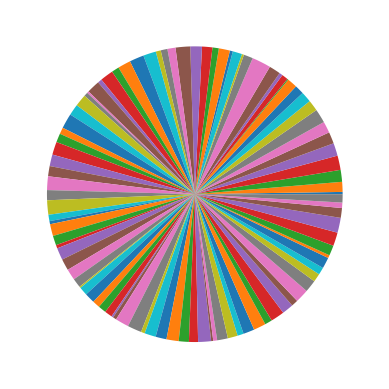

In [96]:
plt.pie(df_score['SCORE_TOTAL'])

5.4. La liste de 5 premiers pays qu'on peurrait conseiller au client pour la réalisation du projet

In [97]:
df_score.sort_values('SCORE_TOTAL', ascending=False)[['SCORE_POP', 'SCORE_WEB', 'SCORE_ENS_SEC', 'SCORE_ENS_SUP', 'SCORE_TOTAL']].iloc[:5]

Indicator Code,SCORE_POP,SCORE_WEB,SCORE_ENS_SEC,SCORE_ENS_SUP,SCORE_TOTAL
Country Name,,,,,
China,1.000000,0.494835,0.572363,0.345919,6.748704
India,0.948389,0.216942,0.450668,0.224247,5.343547
United States,0.233505,0.754132,0.591977,0.761066,5.310524
Denmark,0.004137,0.991632,0.787978,0.715862,5.211145
Finland,0.004003,0.893909,0.882727,0.778696,5.137859


5.5. Ajoutons une explication avec les radar plots

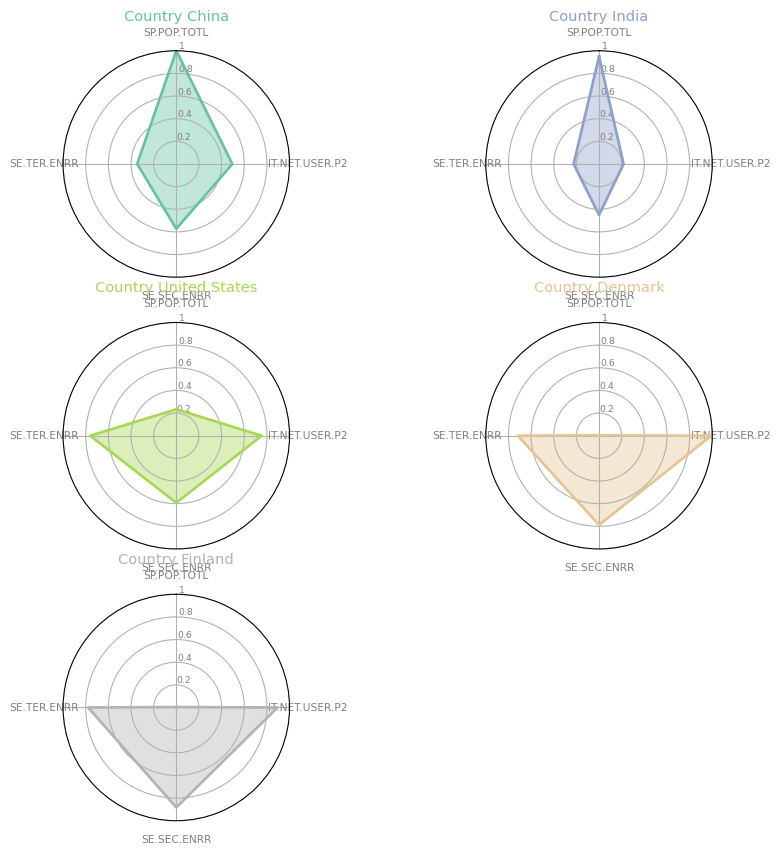

In [98]:
# Définissons les données
df = pd.DataFrame({
'Country': ['China','India','United States','Denmark', 'Finland'],
'SP.POP.TOTL': [1.000000, 0.948389, 0.233505, 0.004137, 0.004003],
'IT.NET.USER.P2': [0.49483, 0.216942, 0.754132, 0.991632, 0.893909],
'SE.SEC.ENRR': [0.57236, 0.450668, 0.591977, 0.787978, 0.882727],
'SE.TER.ENRR': [0.345919, 0.224247, 0.761066, 0.715862, 0.778696]
})
 
# ------- Partie 1: Définissez une fonction qui fait un plot pour une ligne de l'ensemble de données !
 
def make_spider( row, title, color):

    # nombre de variables
    categories=list(df)[1:]
    N = len(categories)

    # Quel sera l'angle de chaque axe du plot ? (on divise le plot / nombre de variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialisons le spider plot
    ax = plt.subplot(3,2,row+1, polar=True, )

    # Si nous voulons que le premier axe soit en haut :
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Dessinons une axe par variable + ajoutons encore des labels d'étiquettes
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Dessinons ylabels
    ax.set_rlabel_position(1)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1], ["0.2","0.4","0.6","0.8","1"], color="grey", size=7)
    plt.ylim(0, 1)

    # Ind1
    values=df.loc[row].drop('Country').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Ajoutons un titre
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- Partie 2: Appliquons la fonction à tous les individus
# initialisons la figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Créons une plage de couleurs:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Boucle pour plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='Country '+df['Country'][row], color=my_palette(row))
    
plt.savefig('SCORE_RADAR_PLOT')

## 6. Analyse des perspectives à venir

6.1. NB : <span style="color: green;">On pourrait appliquer ce score pour choisir un pays parmis les continents en utilisant les groupements de pays : choisir le meilleur pays de chaque continent.<span>

6.2. Analyse du score des 5 premiers pays en tenant compte de nos indicateurs retenus sur les dernières en fournies en données

In [99]:
edStatsData_df_country_keep

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
92960,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,8.331610e+00,9.350290e+00,1.034861e+01,1.083169e+01,1.097640e+01,1.104103e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92964,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,7.681700e-01,9.239400e-01,9.524100e-01,1.097450e+00,1.026200e+00,1.080120e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94158,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1.112612e+07,1.141782e+07,1.172194e+07,1.202782e+07,1.232154e+07,1.259029e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96625,Albania,ALB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882133,Zambia,ZMB,"Population, total",SP.POP.TOTL,4.173928e+06,4.317748e+06,4.469895e+06,4.629402e+06,4.794754e+06,4.964831e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884600,Zimbabwe,ZWE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,7.381360e+00,7.567980e+00,8.159130e+00,8.376400e+00,8.422430e+00,8.684790e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884604,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,1.718440e+00,1.668860e+00,1.673130e+00,1.548440e+00,1.584170e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
pays_top5 = ['China', 'India', 'United States', 'Denmark', 'Finland']
mask_pays_top5 = edStatsData_df_country_keep['Country Name'].isin(pays_top5)
edStatsData_df_country_keep[mask_pays_top5]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
243225,China,CHN,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,2.822388e+01,3.798815e+01,4.578701e+01,5.199147e+01,4.859341e+01,4.932244e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243229,China,CHN,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,1.311400e-01,NaN,NaN,2.123000e-01,3.479000e-01,4.884600e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243265,China,CHN,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244423,China,CHN,"Population, total",SP.POP.TOTL,8.183150e+08,8.411050e+08,8.620300e+08,8.819400e+08,9.003500e+08,9.163950e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287205,Denmark,DNK,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,9.300705e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287209,Denmark,DNK,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,1.885829e+01,2.206874e+01,2.537406e+01,2.766629e+01,2.854543e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287245,Denmark,DNK,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288403,Denmark,DNK,"Population, total",SP.POP.TOTL,4.928757e+06,4.963126e+06,4.991596e+06,5.021861e+06,5.045297e+06,5.059862e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334850,Finland,FIN,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,1.018370e+02,1.058646e+02,1.062161e+02,1.071552e+02,1.062832e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334854,Finland,FIN,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,1.313405e+01,1.365118e+01,1.429139e+01,1.573027e+01,1.695479e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# dataframe des pays retenus
edStatsData_df_country_keep_pays_top5 = edStatsData_df_country_keep[mask_pays_top5]

In [102]:
# on ne conserve que les 5 indicateurs basées sur les informations de 2015
df_score_pays_top5= edStatsData_df_country_keep_pays_top5.pivot_table(index=['Country Name'], columns="Indicator Code")['2015']
df_score_pays_top5

Indicator Code,IT.NET.USER.P2,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL
Country Name,,,,
China,50.300000,94.299210,43.391769,1.371220e+09
Denmark,96.330500,130.824738,82.786972,5.683483e+06
Finland,86.422133,149.456085,87.289703,5.479531e+06
India,26.000000,73.969200,26.874880,1.309054e+09
United States,74.554202,NaN,85.795776,3.208966e+08


Replaçons la valeur manquante en enseignement secondaire 

In [103]:
df_score_pays_top5.loc[df_score_pays_top5['SE.SEC.ENRR'].isna(), 'SE.SEC.ENRR'] = df_score_pays_top5['SE.SEC.ENRR'].mean()

In [104]:
df_score_pays_top5

Indicator Code,IT.NET.USER.P2,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL
Country Name,,,,
China,50.300000,94.299210,43.391769,1.371220e+09
Denmark,96.330500,130.824738,82.786972,5.683483e+06
Finland,86.422133,149.456085,87.289703,5.479531e+06
India,26.000000,73.969200,26.874880,1.309054e+09
United States,74.554202,112.137308,85.795776,3.208966e+08


- Création d'une colonne SCORE_WEB contenant le score de l'indicateur <span style="color: blue;">IT.NET.USER.P2</span> 

In [105]:
df_score_pays_top5['SCORE_WEB'] = df_score_pays_top5['IT.NET.USER.P2'] / df_score_pays_top5['IT.NET.USER.P2'].max()

- Création d'une colonne SCORE_ENS_SEC contenant le score de l'indicateur <span style="color: blue;">SE.SEC.ENRR</span> 

In [106]:
df_score_pays_top5['SCORE_ENS_SEC'] = df_score_pays_top5['SE.SEC.ENRR'] / df_score_pays_top5['SE.SEC.ENRR'].max()

- Création d'une colonne SCORE_ENS_SUP contenant le score de l'indicateur <span style="color: blue;">SE.TER.ENRR</span> 

In [107]:
df_score_pays_top5['SCORE_ENS_SUP'] = df_score_pays_top5['SE.TER.ENRR'] / df_score_pays_top5['SE.TER.ENRR'].max()

- Création d'une colonne SCORE_POP contenant le score de l'indicateur <span style="color: blue;">SP.POP.TOTL</span> 

In [108]:
df_score_pays_top5['SCORE_POP'] = df_score_pays_top5['SP.POP.TOTL'] / df_score_pays_top5['SP.POP.TOTL'].max()

- Création d'un score total qui va faire la synthèse des 4 indicateurs
  - Application de poids sur les scores des differents indicateurs en fonction de leur importance
    - SCORE_WEB      :  3
    - SCORE_ENS_SEC  :  1
    - SCORE_ENS_SUP  :  2
    - SCORE_POP      :  4

In [109]:
df_score_pays_top5['SCORE_TOTAL'] = df_score_pays_top5['SCORE_WEB']*3 + df_score_pays_top5['SCORE_ENS_SEC']*1 + df_score_pays_top5['SCORE_ENS_SUP']*2 + df_score_pays_top5['SCORE_POP']*4

- classement du top 5 en 2015

In [110]:
df_score_pays_top5.sort_values('SCORE_TOTAL', ascending=False)[['SCORE_POP', 'SCORE_WEB', 'SCORE_ENS_SEC', 'SCORE_ENS_SUP', 'SCORE_TOTAL']]

Indicator Code,SCORE_POP,SCORE_WEB,SCORE_ENS_SEC,SCORE_ENS_SUP,SCORE_TOTAL
Country Name,,,,,
China,1.000000,0.522161,0.630949,0.497101,7.191633
United States,0.234023,0.773942,0.750303,0.982885,5.973990
Denmark,0.004145,1.000000,0.875339,0.948416,5.788751
India,0.954664,0.269904,0.494923,0.307881,5.739053
Finland,0.003996,0.897142,1.000000,1.000000,5.707410


In [111]:
# on ne conserve que les 5 indicateurs basées sur les informations de 2016
df_score_pays_top5= edStatsData_df_country_keep_pays_top5.pivot_table(index=['Country Name'], columns="Indicator Code")['2016']
df_score_pays_top5

Indicator Code,IT.NET.USER.P2,SP.POP.TOTL
Country Name,,
China,53.200000,1.378665e+09
Denmark,96.967785,5.731118e+06
Finland,87.703650,5.495096e+06
India,29.547163,1.324171e+09
United States,76.176737,3.231275e+08


Pas de données pour les autres indicateurs en 2016.

In [112]:
# on ne conserve que les 5 indicateurs basées sur les informations de 2013
df_score_pays_top5= edStatsData_df_country_keep_pays_top5.pivot_table(index=['Country Name'], columns="Indicator Code")['2013']
df_score_pays_top5

Indicator Code,IT.NET.USER.P2,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL
Country Name,,,,
China,45.8000,96.241753,30.162069,1.357380e+09
Denmark,94.6297,129.779083,81.237030,5.614932e+06
Finland,91.5144,143.218567,91.065788,5.438972e+06
India,15.1000,68.897209,23.890110,1.278562e+09
United States,71.4000,95.929581,88.808571,3.162049e+08


- Création d'une colonne SCORE_WEB contenant le score de l'indicateur <span style="color: blue;">IT.NET.USER.P2</span> 

In [113]:
df_score_pays_top5['SCORE_WEB'] = df_score_pays_top5['IT.NET.USER.P2'] / df_score_pays_top5['IT.NET.USER.P2'].max()

- Création d'une colonne SCORE_ENS_SEC contenant le score de l'indicateur <span style="color: blue;">SE.SEC.ENRR</span> 

In [114]:
df_score_pays_top5['SCORE_ENS_SEC'] = df_score_pays_top5['SE.SEC.ENRR'] / df_score_pays_top5['SE.SEC.ENRR'].max()

- Création d'une colonne SCORE_ENS_SUP contenant le score de l'indicateur <span style="color: blue;">SE.TER.ENRR</span> 

In [115]:
df_score_pays_top5['SCORE_ENS_SUP'] = df_score_pays_top5['SE.TER.ENRR'] / df_score_pays_top5['SE.TER.ENRR'].max()

- Création d'une colonne SCORE_POP contenant le score de l'indicateur <span style="color: blue;">SP.POP.TOTL</span> 

In [116]:
df_score_pays_top5['SCORE_POP'] = df_score_pays_top5['SP.POP.TOTL'] / df_score_pays_top5['SP.POP.TOTL'].max()

- Création d'un score total qui va faire la synthèse des 4 indicateurs
  - Application de poids sur les scores des differents indicateurs en fonction de leur importance
    - SCORE_WEB      :  3
    - SCORE_ENS_SEC  :  1
    - SCORE_ENS_SUP  :  2
    - SCORE_POP      :  4

In [117]:
df_score_pays_top5['SCORE_TOTAL'] = df_score_pays_top5['SCORE_WEB']*3 + df_score_pays_top5['SCORE_ENS_SEC']*1 + df_score_pays_top5['SCORE_ENS_SUP']*2 + df_score_pays_top5['SCORE_POP']*4

- classement du top 5 en 2015

In [118]:
df_score_pays_top5.sort_values('SCORE_TOTAL', ascending=False)[['SCORE_POP', 'SCORE_WEB', 'SCORE_ENS_SEC', 'SCORE_ENS_SUP', 'SCORE_TOTAL']]

Indicator Code,SCORE_POP,SCORE_WEB,SCORE_ENS_SEC,SCORE_ENS_SUP,SCORE_TOTAL
Country Name,,,,,
China,1.000000,0.483992,0.671992,0.331212,6.786391
Finland,0.004007,0.967079,1.000000,1.000000,5.917265
United States,0.232952,0.754520,0.669812,0.975213,5.815609
Denmark,0.004137,1.000000,0.906161,0.892070,5.706847
India,0.941934,0.159569,0.481063,0.262339,5.252185


L'analyse des perspectives nous permets de conclure que les pays du top 5 seront potentiellement bon pour les années à venir. 

## 7. Conclusion

Après toutes ces analyses et prospections, nous pouvons conseiller au client ces pays du top 5 potententiellement favorablle pour le projet. toutefois, il faudra faire attention à la Finland qui a sont indicateur internet qui diminu au cours des années. 